In [1]:
%matplotlib inline
from numpy import*
from pylab import*
import matplotlib.pyplot as plt
from h5py import File

#STIXGeneral

font = {'family' : 'STIXGeneral',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)
from slab.dsfit import*
from slab import*
import json


C:\ProgramData\Miniconda3\lib\site-packages\visa.py:13: FutureWarning: The visa module provided by PyVISA is being deprecated. You can replace `import visa` by `import pyvisa as visa` to achieve the same effect.

The reason for the deprecation is the possible conflict with the visa package provided by the https://github.com/visa-sdk/visa-python which can result in hard to debug situations.
  warnings.warn(
C:\ProgramData\Miniconda3\lib\site-packages\IPython\qt.py:12: ShimWarning: The `IPython.qt` package has been deprecated since IPython 4.0. You should import from qtconsole instead.
  warn("The `IPython.qt` package has been deprecated since IPython 4.0. "


Warning could not load Chase AWG dll, check that dll located at 'C:\_Lib\python\slab\instruments\awg\chase\dax22000_lib_DLL32.dll'
Could not load InstrumentManagerWindow
Warning could not load LDA labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_atten64.dll'
Warning could not load LMS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\vnx_fmsynth.dll'
Warning could not load LPS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_dps64.dll'
Could not load labbrick
Could not load BKPowerSupply
Could not load BKPowerSupply
Could not load BKPowerSupply
Warning could not load LDA labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_atten64.dll'
Warning could not load LMS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\vnx_fmsynth.dll'
Warning could not load LPS labbrick dll, check that dll located at 'C:\_Lib\python\slab\ins

In [2]:
def fitsin_fixedfreq(xdata,ydata,fitparams=None,domain=None,showfit=False,showstartfit=False,label=""):
    """Fits sin wave of form: p[0]*np.sin(2.*pi*p[1]*x+p[2]*pi/180.)+p[3]"""
    if domain is not None:
        fitdatax,fitdatay = selectdomain(xdata,ydata,domain)
    else:
        fitdatax=xdata
        fitdatay=ydata
    if fitparams is None:    
        FFT=scipy.fft(fitdatay)
        fft_freqs=scipy.fftpack.fftfreq(len(fitdatay),fitdatax[1]-fitdatax[0])
        max_ind=np.argmax(abs(FFT[4:len(fitdatay)/2.]))+4
        fft_val=FFT[max_ind]
        
        fitparams=[0,0,0,0]
        fitparams[3]=np.mean(fitdatay)
        fitparams[0]=(max(fitdatay)-min(fitdatay))/2.#2*abs(fft_val)/len(fitdatay)
        fitparams[1]=fft_freqs[max_ind]
        fitparams[2]=(cmath.phase(fft_val)-np.pi/2.)*180./np.pi
        #fitparams[3]=(max(fitdatax)-min(fitdatax))
        #fitparams[5]=fitdatax[0]
        
    sin2=lambda p,x: p[0]*np.sin(2.*np.pi*4.76180061e-04*x+p[1]*np.pi/180.)+p[2]
    #print "fitparams: ",fitparams
    p1 = fitgeneral(fitdatax, fitdatay, sin2, fitparams, domain=None, showfit=showfit, showstartfit=showstartfit,
                    label=label)
    return p1 

def fitdecaysin_fixedfreq(xdata,ydata,fitparams=None,domain=None,showfit=False,showstartfit=False,label=""):
    """Fits decaying sin wave of form: p[0]*np.sin(2.*pi*p[1]*x+p[2]*pi/180.)*np.e**(-1.*(x-p[5])/p[3])+p[4]"""
    if domain is not None:
        fitdatax,fitdatay = selectdomain(xdata,ydata,domain)
    else:
        fitdatax=xdata
        fitdatay=ydata
    if fitparams is None:    
        FFT=scipy.fft(fitdatay)
        fft_freqs=scipy.fftpack.fftfreq(len(fitdatay),fitdatax[1]-fitdatax[0])
        max_ind=np.argmax(abs(FFT[4:int(len(fitdatay)/2)]))+4
        fft_val=FFT[max_ind]
        
        fitparams=[0,0,0,0,0]
        fitparams[4]=np.mean(fitdatay)
        fitparams[0]=(max(fitdatay)-min(fitdatay))/2.#2*abs(fft_val)/len(fitdatay)
        fitparams[1]=fft_freqs[max_ind]
        fitparams[2]=(cmath.phase(fft_val)-np.pi/2.)*180./np.pi
        fitparams[3]=(max(fitdatax)-min(fitdatax))

        #fitparams[5]=fitdatax[0]
        
    decaysin3 = lambda p, x: p[0] * np.sin(2. * np.pi * 4.76180061e-04 * x + p[1] * np.pi / 180.) * np.e ** (
    -1. * (x - fitdatax[0]) / p[2]) + p[3]
    # decaysin3 = lambda p, x: p[0] * np.sin(2. * np.pi * p[1] * x + p[2] - np.pi / 2.) * np.e ** (
    # -1. * (x - fitdatax[0]) / p[3]) + p[4]
    #print "fitparams: ",fitparams
    p1 = fitgeneral(fitdatax, fitdatay, decaysin3, fitparams, domain=None, showfit=showfit, showstartfit=showstartfit,
                    label=label)
    return p1 

[ -5.44069627e-01   4.76086443e-04   8.33069169e+01   2.62864681e+04
   5.16661177e-01]


NameError: name 'fitparams' is not defined

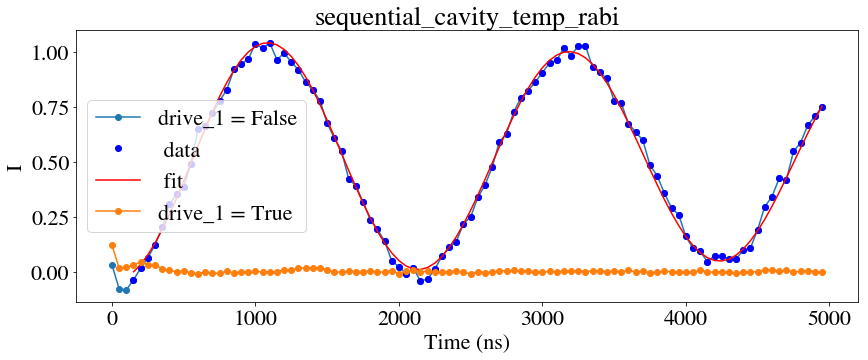

In [3]:
expt_name = 'sequential_cavity_temp_rabi'
filelist = [1]
show = 'I'


def temperature_q(nu,rat):
    Kb = 1.38e-23
    h = 6e-34
    return h*nu/(Kb*log(1/rat))

def occupation_q(nu,T):
    Kb = 1.38e-23
    h = 6e-34
    T = T*1e-3
    return 1/(exp(h*nu/(Kb*T))+1)



for ii,i in enumerate(filelist):
    filename = "..\\data\\" + str(i).zfill(5) + "_"+expt_name.lower()+".h5"
    contrast = []
    with File(filename,'r') as a:

        hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
        experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
        quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
        expt_cfg = (json.loads(a.attrs['experiment_cfg']))['cavity_temp_rabi']
        nu_q = quantum_device_cfg['qubit'][expt_cfg['on_qubits'][0]]['freq']
        nu_r = quantum_device_cfg['readout']['freq']
        nu_c = quantum_device_cfg['flux_pulse_info']['1']['cavity_freqs'][0]
        alpha = quantum_device_cfg['qubit'][expt_cfg['on_qubits'][0]]['anharmonicity']
        
        
        P = array(a[show]) 
        t = arange(expt_cfg['start'],expt_cfg['stop'],expt_cfg['step'])[:(len(P[0]))]

        
        fig = plt.figure(figsize=(14,5))
        ax = fig.add_subplot(111,title= expt_name)
        for i in range(2):
            ax.plot(t,P[i],'o-',label = 'drive_1 = '+ str(i is 1))
            ax.set_xlabel('Time (ns)')
            ax.set_ylabel(show)
            
            ax.legend()
            
        
            if i ==0:
                p = fitdecaysin(t[3:],P[i][3:],fitparams = None,showfit=True)
            else:
                p = fitsin_fixedfreq(t[15:],P[i][15:],fitparams = fitparams,showfit=True)
            
            contrast.append(p[0])
            print (p)
#             ax.axvline(1/(2*p[1]),color='k',linestyle='dashed')
#             ax.axvline(1/(4*p[1]),color='k',linestyle='dashed')

#             print("Half pi length =",1/(4*p[1]),"ns")
#             print("pi length =",1/(2*p[1]),"ns")
            

#     ylim(-0.01,0.01)
    ratio = abs(contrast[1]/contrast[0])

    print ("01 contrast ratio = ",ratio)
    print ("Cavity Temp:" , 1e3*temperature_q(nu_c*1e9,ratio)," mK" )
    print ("Cavity Excited State Occupation:" , occupation_q(nu_c,1e3*temperature_q(nu_c,ratio)))       

In [4]:
expt_name = 'histogram'
filelist = [8]

tags = ['']

rancut = [5,5]
for jj,i in enumerate(filelist):
    filename = "..\\data\\" + str(i).zfill(5) + "_"+expt_name.lower()+".h5"

    with File(filename,'r') as a:

        hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
        experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
        quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
        ran = hardware_cfg['awg_info']['keysight_pxi']['m3102_vpp_range']

        expt_cfg = (json.loads(a.attrs['experiment_cfg']))[expt_name.lower()]
        numbins = expt_cfg['numbins']
        print (numbins)
        numbins = 200
        a_num = expt_cfg['acquisition_num']
        ns = expt_cfg['num_seq_sets']
        readout_length = quantum_device_cfg['readout']['length']
        window = quantum_device_cfg['readout']['window']
        atten = quantum_device_cfg['readout']['dig_atten']
        freq = quantum_device_cfg['readout']['freq']
        print ('Readout length = ',readout_length)
        print ('Readout window = ',window)
        print ("Digital atten = ",atten)
        print ("Readout Freq = ",freq)
        I = array(a['I'])
        Q = array(a['Q'])
        sample = a_num
        
        I,Q = I/2**15*ran,Q/2**15*ran
        
        colors = ['r','b','g']
        labels= ['g','e','f']
        titles=['I','Q']

        IQs = median(I[::3],1),median(Q[::3],1),median(I[1::3],1),median(Q[1::3],1),median(I[2::3],1),median(Q[2::3],1)
        IQsss = I.T.flatten()[0::3],Q.T.flatten()[0::3],I.T.flatten()[1::3],Q.T.flatten()[1::3],I.T.flatten()[2::3],Q.T.flatten()[2::3]
        
        fig = plt.figure(figsize=(15,7*5))

        x0g,y0g  = mean(IQsss[0][::int(a_num/sample)]),mean(IQsss[1][::int(a_num/sample)])
        x0e,y0e  = mean(IQsss[2][::int(a_num/sample)]),mean(IQsss[3][::int(a_num/sample)])
        x0f,y0f  = mean(IQsss[4][::int(a_num/sample)]),mean(IQsss[5][::int(a_num/sample)])


100
Readout length =  3000
Readout window =  [1200, 3900]
Digital atten =  -10
Readout Freq =  8.05135


Text(0,0.5,'Q')

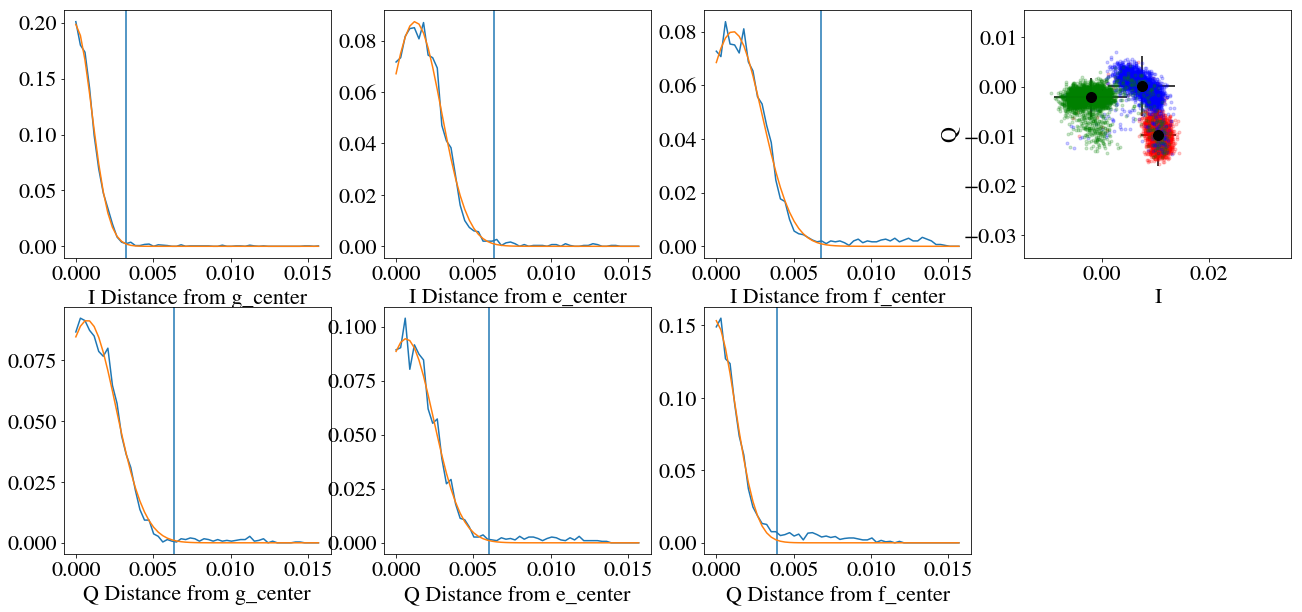

In [5]:
g_center = (median(IQsss[0]),median(IQsss[1]))
e_center = (median(IQsss[2]),median(IQsss[3]))
f_center = (median(IQsss[4]),median(IQsss[5]))

gg_radius_I = abs(IQsss[0]-g_center[0])
gg_radius_Q = abs(IQsss[1]-g_center[1])

ee_radius_I = abs(IQsss[2]-e_center[0])
ee_radius_Q = abs(IQsss[3]-e_center[1])

ff_radius_I = abs(IQsss[4]-f_center[0])
ff_radius_Q = abs(IQsss[5]-f_center[1])


num_sigmas = 3
num_bins = int(sqrt(len(gg_radius_I)))+1
bins = linspace(0,max(gg_radius_I),num_bins)

fig = plt.figure(figsize = (22,10))
ax = fig.add_subplot(2,4,1)
ax.set_xlabel('I Distance from g_center')
counts, bin_edges = np.histogram(gg_radius_I, bins)
counts_g_I = counts/sum(counts)
bins_g_I = bin_edges[:-1]
plot(bins_g_I, counts_g_I)


fitparams_g_I = fitgauss(bins_g_I, counts_g_I, fitparams = None, no_offset = True, showfit=False)
max_gg_I_radius = fitparams_g_I[1] + num_sigmas*fitparams_g_I[2]
axvline(max_gg_I_radius)
gauss_g_I = gaussfunc_nooffset(fitparams_g_I,bins_g_I)
plot(bins_g_I,gaussfunc_nooffset(fitparams_g_I,bins_g_I))

ax = fig.add_subplot(2,4,5)
ax.set_xlabel('Q Distance from g_center')
counts, bin_edges = np.histogram(gg_radius_Q, bins)
counts_g_Q = counts/sum(counts)
bins_g_Q = bin_edges[:-1]
plot(bins_g_Q, counts_g_Q)


fitparams_g_Q = fitgauss(bins_g_Q, counts_g_Q, fitparams = None, no_offset = True, showfit=False)
max_gg_Q_radius = fitparams_g_Q[1] + num_sigmas*fitparams_g_Q[2]
axvline(max_gg_Q_radius)
gauss_g_Q = gaussfunc_nooffset(fitparams_g_Q,bins_g_Q)
plot(bins_g_Q,gaussfunc_nooffset(fitparams_g_Q,bins_g_Q))


ax = fig.add_subplot(2,4,2)
ax.set_xlabel('I Distance from e_center')
counts, bin_edges = np.histogram(ee_radius_I, bins)
counts_e_I = counts/sum(counts)
bins_e_I = bin_edges[:-1]
plot(bins_e_I, counts_e_I)


fitparams_e_I = fitgauss(bins_e_I, counts_e_I, fitparams = None, no_offset = True, showfit=False)
max_ee_I_radius = fitparams_e_I[1] + num_sigmas*fitparams_e_I[2]
axvline(max_ee_I_radius)
gauss_e_I = gaussfunc_nooffset(fitparams_e_I,bins_e_I)
plot(bins_e_I,gaussfunc_nooffset(fitparams_e_I,bins_e_I))

ax = fig.add_subplot(2,4,6)
ax.set_xlabel('Q Distance from e_center')
counts, bin_edges = np.histogram(ee_radius_Q, bins)
counts_e_Q = counts/sum(counts)
bins_e_Q = bin_edges[:-1]
plot(bins_e_Q, counts_e_Q)


fitparams_e_Q = fitgauss(bins_e_Q, counts_e_Q, fitparams = None, no_offset = True, showfit=False)
max_ee_Q_radius = fitparams_e_Q[1] + num_sigmas*fitparams_e_Q[2]
axvline(max_ee_Q_radius)
gauss_e_Q = gaussfunc_nooffset(fitparams_e_Q,bins_e_Q)
plot(bins_e_Q,gaussfunc_nooffset(fitparams_e_Q,bins_e_Q))



ax = fig.add_subplot(2,4,3)
ax.set_xlabel('I Distance from f_center')
counts, bin_edges = np.histogram(ff_radius_I, bins)
counts_f_I = counts/sum(counts)
bins_f_I = bin_edges[:-1]
plot(bins_f_I, counts_f_I)


fitparams_f_I = fitgauss(bins_f_I, counts_f_I, fitparams = None, no_offset = True, showfit=False)
max_ff_I_radius = fitparams_f_I[1] + num_sigmas*fitparams_f_I[2]
axvline(max_ff_I_radius)
gauss_f_I = gaussfunc_nooffset(fitparams_f_I,bins_f_I)
plot(bins_f_I,gaussfunc_nooffset(fitparams_f_I,bins_f_I))

ax = fig.add_subplot(2,4,7)
ax.set_xlabel('Q Distance from f_center')
counts, bin_edges = np.histogram(ff_radius_Q, bins)
counts_f_Q = counts/sum(counts)
bins_f_Q = bin_edges[:-1]
plot(bins_f_Q, counts_f_Q)


fitparams_f_Q = fitgauss(bins_f_Q, counts_f_Q, fitparams = None, no_offset = True, showfit=False)
max_ff_Q_radius = fitparams_f_Q[1] + num_sigmas*fitparams_f_Q[2]
axvline(max_ff_Q_radius)
gauss_f_Q = gaussfunc_nooffset(fitparams_f_Q,bins_f_Q)
plot(bins_f_Q,gaussfunc_nooffset(fitparams_f_Q,bins_f_Q))



centers = [g_center,e_center,f_center]
counts_I = [counts_g_I,counts_f_I,counts_f_I]
counts_Q = [counts_g_Q,counts_f_Q,counts_f_Q]
distributions_I = [gauss_g_I,gauss_e_I,gauss_f_I]
distributions_Q = [gauss_g_Q,gauss_e_Q,gauss_f_Q]
I_err = [max_gg_I_radius,max_ee_I_radius,max_ff_I_radius]
Q_err = [max_gg_Q_radius,max_ee_Q_radius,max_ff_Q_radius]
bins = bins[:-1]

ax = fig.add_subplot(2,4,4)
for ii in [0,1,2]:
    ax.plot(IQsss[2*ii][::int(a_num/sample)],IQsss[2*ii+1][::int(a_num/sample)],'.',color = colors[ii],alpha=0.2)
ax.set_xlim(x0g-ran/rancut[0],x0g+ran/rancut[0])
ax.set_ylim(y0g-ran/rancut[0],y0g+ran/rancut[0])

for ii in [0,1,2]:
#     ax.errorbar(mean(IQsss[arg][2*ii]),mean(IQsss[arg][2*ii+1]),xerr = std(IQsss[arg][2*ii]),yerr = std(IQsss[arg][2*ii+1]),fmt = 'o',color='k',markersize=10)
    ax.errorbar(centers[ii][0],centers[ii][1],xerr = I_err[ii],yerr = Q_err[ii],fmt = 'o',color='k',markersize=10)

ax.set_xlabel('I')
ax.set_ylabel('Q')



Text(0,0.5,'Q')

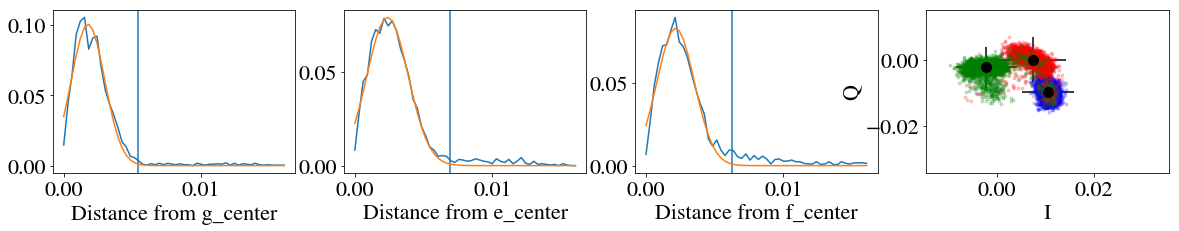

In [6]:
g_center = (median(IQsss[0]),median(IQsss[1]))
e_center = (median(IQsss[2]),median(IQsss[3]))
f_center = (median(IQsss[4]),median(IQsss[5]))

gg_radius = sqrt((IQsss[0]-g_center[0])**2 + (IQsss[1]-g_center[1])**2)
eg_radius = sqrt((IQsss[0]-e_center[0])**2 + (IQsss[1]-e_center[1])**2)
fg_radius = sqrt((IQsss[0]-f_center[0])**2 + (IQsss[1]-f_center[1])**2)

ge_radius = sqrt((IQsss[2]-g_center[0])**2 + (IQsss[3]-g_center[1])**2)
ee_radius = sqrt((IQsss[2]-e_center[0])**2 + (IQsss[3]-e_center[1])**2)
fe_radius = sqrt((IQsss[2]-f_center[0])**2 + (IQsss[3]-f_center[1])**2)

gf_radius = sqrt((IQsss[4]-g_center[0])**2 + (IQsss[5]-g_center[1])**2)
ef_radius = sqrt((IQsss[4]-e_center[0])**2 + (IQsss[5]-e_center[1])**2)
ff_radius = sqrt((IQsss[4]-f_center[0])**2 + (IQsss[5]-f_center[1])**2)

num_sigmas = 3
num_bins = int(sqrt(len(ge_radius)))+1
bins = linspace(0,max(gg_radius),num_bins)

fig = plt.figure(figsize = (20,3))
ax = fig.add_subplot(1,4,1)
ax.set_xlabel('Distance from g_center')
counts, bin_edges = np.histogram(gg_radius, bins)
counts_g = counts/sum(counts)
bins_g = bin_edges[:-1]
plot(bins_g, counts_g)


fitparams_g = fitgauss(bins_g, counts_g, fitparams = None, no_offset = True, showfit=False)
max_gg_radius = fitparams_g[1] + num_sigmas*fitparams_g[2]
axvline(max_gg_radius)
gauss_g = gaussfunc_nooffset(fitparams_g,bins_g)
plot(bins_g,gaussfunc_nooffset(fitparams_g,bins_g))


ax = fig.add_subplot(1,4,2)
ax.set_xlabel('Distance from e_center')
counts, bin_edges = np.histogram(ee_radius, bins)
counts_e = counts/sum(counts)
bins_e = bin_edges[:-1]
plot(bins_e, counts_e)

fitparams_e = fitgauss(bins_e, counts_e, fitparams = None, no_offset = True, showfit=False)
max_ee_radius = fitparams_e[1] + num_sigmas*fitparams_e[2]
axvline(max_ee_radius)
gauss_e = gaussfunc_nooffset(fitparams_e,bins_e)
plot(bins_e,gaussfunc_nooffset(fitparams_e,bins_e))


ax = fig.add_subplot(1,4,3)
ax.set_xlabel('Distance from f_center')
counts, bin_edges = np.histogram(ff_radius, bins)
counts_f = counts/sum(counts)
bins_f = bin_edges[:-1]
plot(bins_f, counts_f)

fitparams_f = fitgauss(bins_f, counts_f, fitparams = None, no_offset = True, showfit=False)
max_ff_radius = fitparams_f[1] + num_sigmas*fitparams_f[2]
axvline(max_ff_radius)
gauss_f = gaussfunc_nooffset(fitparams_f,bins_f)
plot(bins_f,gaussfunc_nooffset(fitparams_f,bins_f))


centers = [g_center,e_center,f_center]
distributions = [gauss_g,gauss_e,gauss_f]
counts = [counts_g,counts_e,counts_f]
max_radius = [max_gg_radius,max_ee_radius,max_ff_radius]
bins = bins[:-1]

colors = ['b', 'r', 'g']
ax = fig.add_subplot(1,4,4)
for ii in [0,1,2]:
    ax.plot(IQsss[2*ii][::int(a_num/sample)],IQsss[2*ii+1][::int(a_num/sample)],'.',color = colors[ii],alpha=0.2)
ax.set_xlim(x0g-ran/rancut[0],x0g+ran/rancut[0])
ax.set_ylim(y0g-ran/rancut[0],y0g+ran/rancut[0])


for ii in [0,1,2]:
    ax.errorbar(centers[ii][0],centers[ii][1],xerr = max_radius[ii],yerr = max_radius[ii],fmt = 'o',color='k',markersize=10)

ax.set_xlabel('I')
ax.set_ylabel('Q')


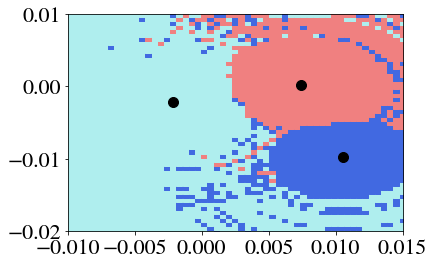

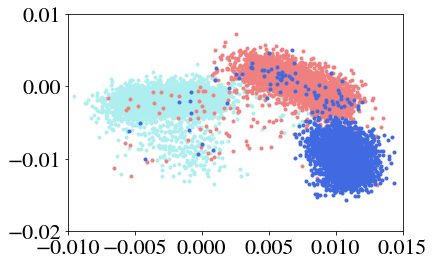

In [7]:
from matplotlib.pyplot import*
from matplotlib.cm import*

save_fig = False
x = linspace(-0.01,0.015, 55)
y = linspace(-0.02,0.01, 55)

colors = rainbow(linspace(0, 1, len(counts)))
colors = ['royalblue', 'lightcoral', 'paleturquoise']

readout_map = []
read_thresh = 1/2

figure()
for x_point in x:
    for y_point in y:
        probs_counts = []
        for ii in range(len(centers[0:3])):
            dist = sqrt((x_point-centers[ii][0])**2 + (y_point-centers[ii][1])**2)
            dist_index = argmin(abs(bins-dist))
            probs_counts.append(counts[ii][dist_index])
        probs_counts = probs_counts/sum(probs_counts)
        value = 0
        if probs_counts[0] > read_thresh:
            value = 0
        elif probs_counts[1] > read_thresh:
            value = 1
        elif probs_counts[2] > read_thresh:
            value = 2
        scatter(x_point, y_point, color = colors[value], alpha =1.0, marker = 's')
        
for ii in [0,1,2]:
    scatter(centers[ii][0],centers[ii][1],color='k', marker = 'o',s = 100)
xlim(-0.01,0.015)
ylim(-0.02,0.01)
if save_fig:
    savefig('../figures/readout_map.pdf', format='pdf', dpi=1200)

figure()
for ii in [2,1,0]:
    plot(IQsss[2*ii][::int(a_num/sample)],IQsss[2*ii+1][::int(a_num/sample)],'.',color = colors[ii],alpha=1.0)
xlim(-0.01,0.015)
ylim(-0.02,0.01)
if save_fig:
    savefig('../figures/readout_hist.pdf', format='pdf', dpi=1200)

g fidelity: 0.958 pm 0.004
e fidelity: 0.953 pm 0.005
f fidelity: 0.929 pm 0.005


Text(0.5,1,'Prob of qubit prepared in f, measured as f')

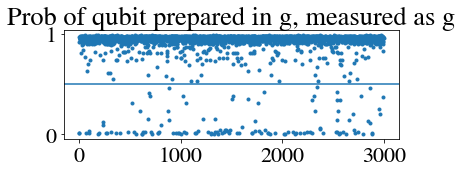

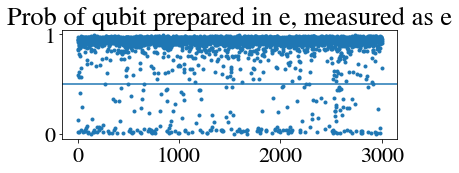

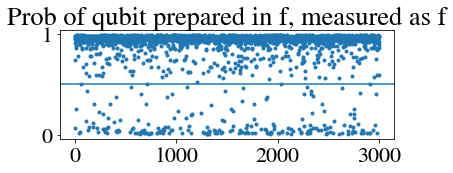

In [7]:
g_I = IQsss[0]
g_Q = IQsss[1]
e_I = IQsss[2]
e_Q = IQsss[3]
f_I = IQsss[4]
f_Q = IQsss[5]

g_qubit_state_prob_counts = []
e_qubit_state_prob_counts = []
f_qubit_state_prob_counts = []
for jj in range(len(g_I)):
    g_probs_counts = []
    e_probs_counts = []
    f_probs_counts = []
    for ii in range(len(centers[0:3])):
            dist = sqrt((g_I[jj]-centers[ii][0])**2 + (g_Q[jj]-centers[ii][1])**2)
            dist_index = argmin(abs(bins-dist))
            g_probs_counts.append(counts[ii][dist_index])
            
            dist = sqrt((e_I[jj]-centers[ii][0])**2 + (e_Q[jj]-centers[ii][1])**2)
            dist_index = argmin(abs(bins-dist))
            e_probs_counts.append(counts[ii][dist_index])
            
            dist = sqrt((f_I[jj]-centers[ii][0])**2 + (f_Q[jj]-centers[ii][1])**2)
            dist_index = argmin(abs(bins-dist))
            f_probs_counts.append(counts[ii][dist_index])
            
    g_probs_counts = g_probs_counts/sum(g_probs_counts)
    g_qubit_state_prob_counts.append(g_probs_counts)
    
    e_probs_counts = e_probs_counts/sum(e_probs_counts)
    e_qubit_state_prob_counts.append(e_probs_counts)
    
    f_probs_counts = f_probs_counts/sum(f_probs_counts)
    f_qubit_state_prob_counts.append(f_probs_counts)

g_state_prob_list = asarray(g_qubit_state_prob_counts).T[0]
e_state_prob_list = asarray(e_qubit_state_prob_counts).T[1]
f_state_prob_list = asarray(f_qubit_state_prob_counts).T[2]


g_counter = 0
e_counter = 0
f_counter = 0
readout_thresh = 1/2
for ii in range(len(g_state_prob_list)):
    if g_state_prob_list[ii] <= readout_thresh:
        g_counter = g_counter + 1
    if e_state_prob_list[ii] <= readout_thresh:
        e_counter = e_counter + 1
    if f_state_prob_list[ii] <= readout_thresh:
        f_counter = f_counter + 1

Pge = 0.03*(1-exp(-3/108))
Peg = 1-exp(-3/108)

# Pge=0
# Peg=0

g_inf = g_counter/len(g_state_prob_list) - Pge
e_inf = e_counter/len(e_state_prob_list) - Peg
f_inf = f_counter/len(f_state_prob_list)

g_inf_err = sqrt(g_counter)/len(g_state_prob_list)
e_inf_err = sqrt(e_counter)/len(e_state_prob_list)
f_inf_err = sqrt(f_counter)/len(f_state_prob_list)
        
print ("g fidelity: %.3f pm %.3f" %(1-g_inf, g_inf_err))
print ("e fidelity: %.3f pm %.3f" %(1-e_inf, e_inf_err))
print ("f fidelity: %.3f pm %.3f" %(1-f_inf, f_inf_err))

figure(figsize = (6,2))
plot(g_state_prob_list, '.')
axhline(readout_thresh)
title("Prob of qubit prepared in g, measured as g")

figure(figsize = (6,2))
plot(e_state_prob_list, '.')
axhline(readout_thresh)
title("Prob of qubit prepared in e, measured as e")

figure(figsize = (6,2))
plot(f_state_prob_list, '.')
axhline(readout_thresh)
title("Prob of qubit prepared in f, measured as f")

trigger period = 500 us
8.05135


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in true_divide


f T1  = 100.030222423 us
f T1  = 69.7614149502 us
f T1  = 68.8785884629 us
f T1  = 69.7614149502 us


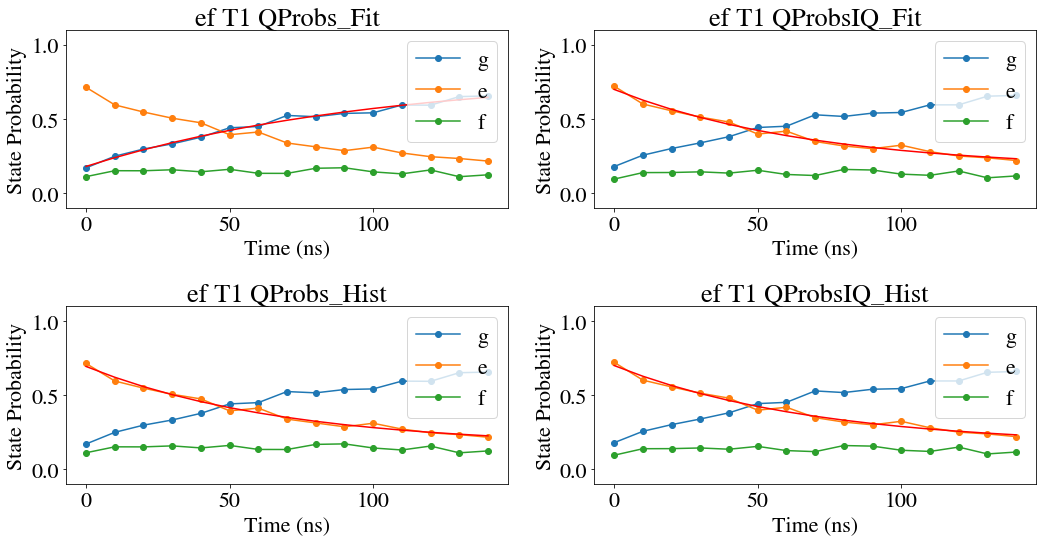

In [8]:
expt_name = 't1'
filelist = [5]


shows = 'I'
rancut=[5]
for ii,i in enumerate(filelist):
        
    filename = "..\\data\\" + str(i).zfill(5) + "_"+expt_name.lower()+".h5"

    with File(filename,'r') as a:

        hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
        experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
        quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
        expt_cfg = (json.loads(a.attrs['experiment_cfg']))[expt_name.lower()]
        nu_q = quantum_device_cfg['qubit'][expt_cfg['on_qubits'][0]]['freq']
        alpha = quantum_device_cfg['qubit'][expt_cfg['on_qubits'][0]]['anharmonicity']
        nu_r = quantum_device_cfg['readout']['freq']
        trigger_period = hardware_cfg['trigger']['period_us']
        print ("trigger period =",trigger_period,"us")
        hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
        experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
        quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
        ran = hardware_cfg['awg_info']['keysight_pxi']['m3102_vpp_range']
        print (quantum_device_cfg['readout']['freq'])

      
        numbins = experiment_cfg['histogram']['numbins']
        numbins = 200

        I,Q = array(a['I']),array(a['Q'])
        t = arange(expt_cfg['start'],expt_cfg['stop'],expt_cfg['step'])[:(len(I))]/1e3
        slicelist=arange(len(t))
        
        I,Q = I/2**15*ran,Q/2**15*ran
       

        qubit_state_prob = []
        qubit_state_prob_counts = []
        qubit_state_prob_IQ = []
        qubit_state_prob_IQ_counts = []
        for jj,sl in enumerate(slicelist):            
            avg_probs = [0,0,0]
            avg_probs_IQ = [0,0,0]
            avg_probs_counts = [0,0,0]
            avg_probs_IQ_counts = [0,0,0]
            for kk in range(len(I[sl])):
                
                probs_I = []
                probs_Q = []
                probs_I_counts = []
                probs_Q_counts = []
                probs = []
                probs_counts = []
                probs_IQ = []
                probs_IQ_counts = []
                for ii in range(len(centers)):
                    dist_I = abs(I[sl][kk]-centers[ii][0])
                    dist_I_index = argmin(abs(bins-dist_I))
                    probs_I.append(distributions_I[ii][dist_I_index])
                    probs_I_counts.append(counts_I[ii][dist_I_index])
                    dist_Q = abs(Q[sl][kk]-centers[ii][1])
                    dist_Q_index = argmin(abs(bins-dist_Q))
                    probs_Q.append(distributions_Q[ii][dist_Q_index])
                    probs_Q_counts.append(counts_Q[ii][dist_Q_index])
                    
                    dist = sqrt((I[sl][kk]-centers[ii][0])**2 + (Q[sl][kk]-centers[ii][1])**2)
                    dist_index = argmin(abs(bins-dist))
                    probs.append(distributions[ii][dist_index])
                    probs_counts.append(counts[ii][dist_index])
                probs = probs/sum(probs)
                probs_counts = probs_counts/sum(probs_counts)
                probs_IQ = array(probs_I)*array(probs_Q)/sum(array(probs_I)*array(probs_Q))
                probs_IQ_counts = array(probs_I_counts)*array(probs_Q_counts)/sum(array(probs_I_counts)*array(probs_Q_counts))
                avg_probs = avg_probs + probs
                avg_probs_counts = avg_probs_counts + probs_counts
                avg_probs_IQ = avg_probs_IQ + probs_IQ
                avg_probs_IQ_counts = avg_probs_IQ_counts + probs_IQ_counts
            avg_probs = avg_probs/(len(I[sl]))
            avg_probs_IQ = avg_probs_IQ/(len(I[sl]))
            qubit_state_prob.append(avg_probs)
            qubit_state_prob_IQ.append(avg_probs_IQ)
            avg_probs_counts = avg_probs_counts/(len(I[sl]))
            avg_probs_IQ_counts = avg_probs_IQ_counts/(len(I[sl]))
            qubit_state_prob_counts.append(avg_probs)
            qubit_state_prob_IQ_counts.append(avg_probs_IQ)
            
        fig = figure(figsize=(15,8))
        fig.add_subplot(2,2,1)
        plot(t,qubit_state_prob, 'o-')
        p = fitexp(t,array(qubit_state_prob).T[0],showfit=False)
        plot(t,expfunc(p,t),'r-')
        print("f T1  =",p[3],"us")
        ylim(-0.1,1.1)
        xlabel('Time (ns)')
        ylabel("State Probability")
        title("ef T1 QProbs_Fit")
        legend(['g','e','f'], loc=1)
        fig.add_subplot(2,2,2)
        plot(t,qubit_state_prob_IQ, 'o-')
        p = fitexp(t,array(qubit_state_prob_IQ).T[1],showfit=False)
        plot(t,expfunc(p,t),'r-')
        print("f T1  =",p[3],"us")
        ylim(-0.1,1.1)
        xlabel('Time (ns)')
        ylabel("State Probability")
        legend(['g','e','f'], loc=1)
        title("ef T1 QProbsIQ_Fit")
        fig.add_subplot(2,2,3)
        plot(t,qubit_state_prob_counts, 'o-')
        p = fitexp(t,array(qubit_state_prob_counts).T[1],showfit=False)
        plot(t,expfunc(p,t),'r-')
        print("f T1  =",p[3],"us")
        ylim(-0.1,1.1)
        xlabel('Time (ns)')
        ylabel("State Probability")
        title("ef T1 QProbs_Hist")
        legend(['g','e','f'], loc=1)
        fig.add_subplot(2,2,4)
        plot(t,qubit_state_prob_IQ_counts, 'o-')
        p = fitexp(t,array(qubit_state_prob_IQ_counts).T[1],showfit=False)
        plot(t,expfunc(p,t),'r-')
        print("f T1  =",p[3],"us")
        ylim(-0.1,1.1)
        xlabel('Time (ns)')
        ylabel("State Probability")
        legend(['g','e','f'], loc=1)
        title("ef T1 QProbsIQ_Hist")
        tight_layout()

In [43]:
def forward(meas_seq, T, E):
        num_meas = len(meas_seq)
        N = T.shape[0]
        alpha = zeros((num_meas, N))
        pi = [0.25,0.25,0.25,0.25]
        alpha[0] = pi*E[:,meas_seq[0]]
        for t in range(1, num_meas):
            alpha[t] = alpha[t-1].dot(T) * E[:, meas_seq[t]]
        return alpha
    
def backward(meas_seq, T, E):
        N = T.shape[0]
        num_meas = len(meas_seq)

        beta = zeros((N,num_meas))
        beta[:,-1:] = 1

        for t in reversed(range(num_meas-1)):
            for n in range(N):
                beta[n,t] = sum(beta[:,t+1] * T[n,:] * E[:, meas_seq[t+1]])

        return beta
    
def likelihood(meas_seq, T, E):
        # returns log P(Y  \mid  model)
        # using the forward part of the forward-backward algorithm
        return  forward(meas_seq, T, E)[-1].sum()
    
def gamma(meas_seq,T,E):
    alpha = forward(meas_seq, T, E)
    beta  = backward(meas_seq, T, E)
    obs_prob = likelihood(meas_seq, T, E)
    return (multiply(alpha,beta.T) / obs_prob)

def viterbi(meas_seq, T, E):
        # returns the most likely state sequence given observed sequence x
        # using the Viterbi algorithm
        num_meas = len(meas_seq)
        N = T.shape[0]
        delta = zeros((num_meas, N))
        psi = zeros((num_meas, N))
        pi = [0.25,0.25,0.25,0.25]
        delta[0] = pi*E[:,meas_seq[0]]
        for t in range(1, num_meas):
            for j in range(N):
                delta[t,j] = max(delta[t-1]*T[:,j]) * E[j, meas_seq[t]]
                psi[t,j] = argmax(delta[t-1]*T[:,j])

        # backtrack
        states = zeros(num_meas, dtype=int32)
        states[num_meas-1] = argmax(delta[num_meas-1])
        for t in range(num_meas-2, -1, -1):
            states[t] = psi[t+1, states[t+1]]
        return states
    
trigger_period = 4.520
parity_time = 0.476
cav_t1 = 1600
qubit_t1 = 120
qubit_t2 = 180
cav_n= 0.006
qubit_n = 1e-2
g_infidelity = 0.03
e_infidelity = 0.03
parity_err = 0

P01 = cav_n * (1-exp(-trigger_period/cav_t1))
P10 = 1-exp(-trigger_period/cav_t1)
Pge = qubit_n * (1-exp(-trigger_period/qubit_t1)) + (1-exp(-parity_time/qubit_t2)) + parity_err
Peg = (1-exp(-trigger_period/qubit_t1)) + (1-exp(-parity_time/qubit_t2)) + parity_err

T = asarray([[(1-P01)*(1-Pge), (1-P01)*Pge, P01*Pge, P01*(1-Pge)],
     [(1-P01)*Peg, (1-P01)*(1-Peg), P01*(1-Peg), P01*Peg],
     [P10*(1-Pge), P10*Pge, (1-P10)*Pge, (1-P10)*(1-Pge)],
     [P10*Peg, P10*(1-Peg), (1-P10)*(1-Peg), (1-P10)*Peg]])

E = 0.5*asarray([[1-g_infidelity, g_infidelity],
    [e_infidelity, 1- e_infidelity],
    [1-g_infidelity, g_infidelity],
    [e_infidelity, 1- e_infidelity]])

print (trig_period)

# meas_seq = state_sequence_list[51][10:]
# meas_index = arange(len(meas_seq))

# figure (figsize=(18,3))
# plot(meas_index, meas_seq, 'o--')

print(T)
print(E)

4.52
[[9.96972513e-01 3.01056104e-03 5.09578614e-08 1.68751228e-05]
 [3.96063819e-02 9.60376692e-01 1.62556885e-05 6.70392161e-07]
 [2.81252047e-03 8.49297691e-06 3.00211902e-03 9.94176868e-01]
 [1.11732027e-04 2.70928142e-03 9.57683666e-01 3.94953203e-02]]
[[0.485 0.015]
 [0.015 0.485]
 [0.485 0.015]
 [0.015 0.485]]


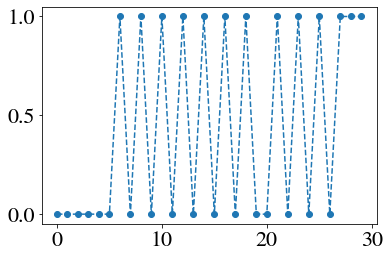

In [21]:
plot(meas_sequence, 'o--')

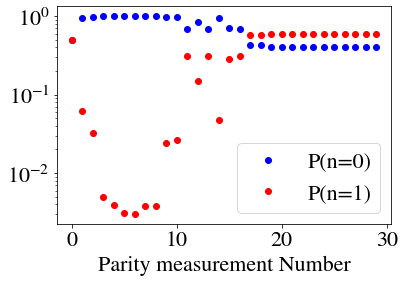

In [47]:
meas_seq = [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0]
# meas_sequence = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0]
# plot(meas_sequence,'go--')

#         title('Flip Boolean')
# ylim(-0.1,1.1)
tight_layout()
P0 = []
P1 = []
for kk in range (len(meas_seq[:])):
    temp_meas_sequence = meas_seq[0:kk+1]
    gamma_matrix = gamma(temp_meas_sequence, T, E)
    P0.append(gamma_matrix[0,0] + gamma_matrix[0,1])
    P1.append(gamma_matrix[0,2] + gamma_matrix[0,3])
# gamma_matrix = gamma(meas_sequence, T, E)
# P0 = gamma_matrix[:,0] + gamma_matrix[:,1]
# P1 = gamma_matrix[:,2] + gamma_matrix[:,3]
semilogy(P0, 'bo', label= "P(n=0)")
semilogy(P1, 'ro', label= "P(n=1)")
# ylim(1e-21,1e2)
xlabel('Parity measurement Number')    
legend()

In [48]:
P0[-1], P1[-1]

(0.40779255748280524, 0.5922074425171937)

In [ ]:
def forward(meas_seq, T, E):
        num_meas = len(meas_seq)
        N = T.shape[0]
        alpha = zeros((num_meas, N))
        pi = [0.25,0.25,0.25,0.25]
        alpha[0] = pi*E[:,meas_seq[0]]
        for t in range(1, num_meas):
            alpha[t] = alpha[t-1].dot(T) * E[:, meas_seq[t]]
        return alpha
    
def backward(meas_seq, T, E):
        N = T.shape[0]
        num_meas = len(meas_seq)

        beta = zeros((N,num_meas))
        beta[:,-1:] = 1

        for t in reversed(range(num_meas-1)):
            for n in range(N):
                beta[n,t] = sum(beta[:,t+1] * T[n,:] * E[:, meas_seq[t+1]])

        return beta
    
def likelihood(meas_seq, T, E):
        # returns log P(Y  \mid  model)
        # using the forward part of the forward-backward algorithm
        return  forward(meas_seq, T, E)[-1].sum()
    
def gamma(meas_seq,T,E):
    alpha = forward(meas_seq, T, E)
    beta  = backward(meas_seq, T, E)
    obs_prob = likelihood(meas_seq, T, E)
    return (multiply(alpha,beta.T) / obs_prob)

def viterbi(meas_seq, T, E):
        # returns the most likely state sequence given observed sequence x
        # using the Viterbi algorithm
        num_meas = len(meas_seq)
        N = T.shape[0]
        delta = zeros((num_meas, N))
        psi = zeros((num_meas, N))
        pi = [0.25,0.25,0.25,0.25]
        delta[0] = pi*E[:,meas_seq[0]]
        for t in range(1, num_meas):
            for j in range(N):
                delta[t,j] = max(delta[t-1]*T[:,j]) * E[j, meas_seq[t]]
                psi[t,j] = argmax(delta[t-1]*T[:,j])

        # backtrack
        states = zeros(num_meas, dtype=int32)
        states[num_meas-1] = argmax(delta[num_meas-1])
        for t in range(num_meas-2, -1, -1):
            states[t] = psi[t+1, states[t+1]]
        return states
    
trig_period = (trigger_period)*1e-6
parity_time = 0.380e-6
cav_t1 = 545.8e-6
qubit_t1 = 108.65e-6
qubit_t2 = 60.67e-6
# cav_n = 7.3e-4
cav_n= 0.0
qubit_n = 5.07e-2
g_infidelity = g_inf
e_infidelity = e_inf
parity_err = 0

P01 = cav_n * (1-exp(-trigger_period*1e-6/cav_t1))
P10 = 1-exp(-trigger_period*1e-6/cav_t1)
Pge = qubit_n * (1-exp(-trigger_period*1e-6/qubit_t1)) + (1-exp(-parity_time/qubit_t2)) + parity_err
Peg = (1-exp(-trigger_period*1e-6/qubit_t1)) + (1-exp(-parity_time/qubit_t2)) + parity_err

T = asarray([[(1-P01)*(1-Pge), (1-P01)*Pge, P01*Pge, P01*(1-Pge)],
     [(1-P01)*Peg, (1-P01)*(1-Peg), P01*(1-Peg), P01*Peg],
     [P10*(1-Pge), P10*Pge, (1-P10)*Pge, (1-P10)*(1-Pge)],
     [P10*Peg, P10*(1-Peg), (1-P10)*(1-Peg), (1-P10)*Peg]])

E = 0.5*asarray([[1-g_infidelity, g_infidelity],
    [e_infidelity, 1- e_infidelity],
    [1-g_infidelity, g_infidelity],
    [e_infidelity, 1- e_infidelity]])

print (trig_period)

# meas_seq = state_sequence_list[51][10:]
# meas_index = arange(len(meas_seq))

# figure (figsize=(18,3))
# plot(meas_index, meas_seq, 'o--')

print(T)
print(E)

alpha len:  80 , alpha amp:  0.5
cavity n:  0.700888503327
trigger period = 10 us


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


alpha len:  50 , alpha amp:  0.25
cavity n:  0.068446142903
trigger period = 5 us


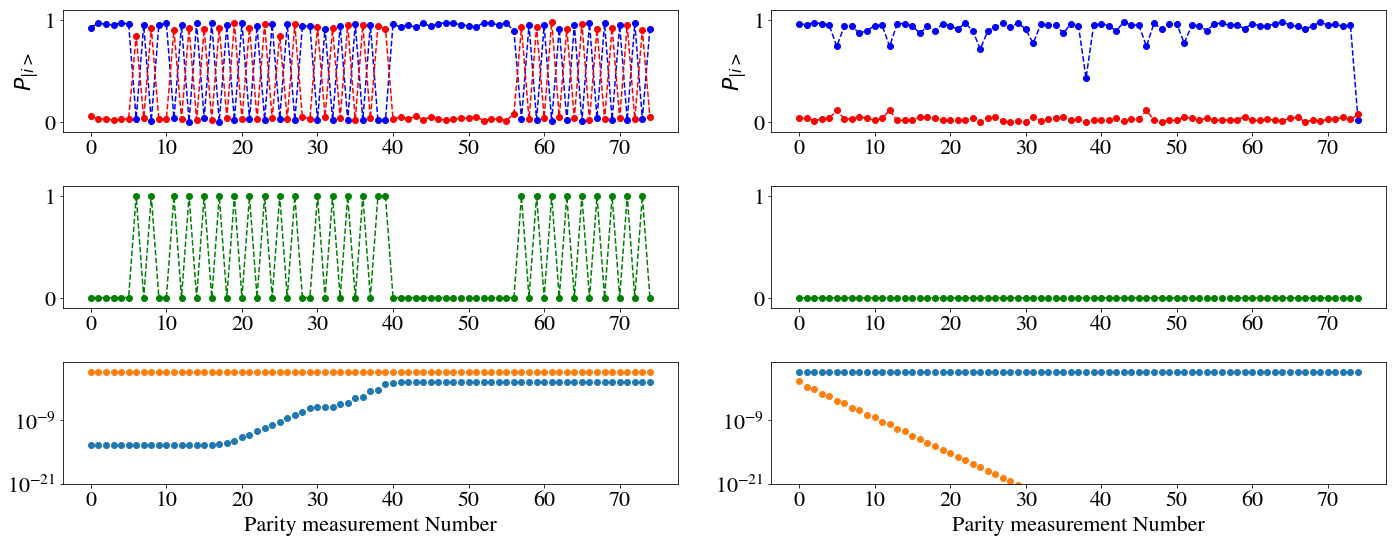

In [18]:
expt_name = 'repetitive_parity_measurement'
filelist = [5,9]

        

figure(figsize = (20,8))
for kk,i in enumerate(filelist):
    filename = "..\\data\\" + str(i).zfill(5) + "_"+expt_name.lower()+".h5"
    with File(filename,'r') as a:

        hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
        experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
        quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
        expt_cfg = (json.loads(a.attrs['experiment_cfg']))[expt_name.lower()]
        nu_q = quantum_device_cfg['qubit'][expt_cfg['on_qubits'][0]]['freq']
        alpha = quantum_device_cfg['qubit'][expt_cfg['on_qubits'][0]]['anharmonicity']
        nu_r = quantum_device_cfg['readout']['freq']
        trigger_period = hardware_cfg['trigger']['period_us']
        alpha_len = expt_cfg['alpha_len']
        alpha_amp = expt_cfg['alpha_amp']
        print ('alpha len: ', alpha_len, ', alpha amp: ', alpha_amp)
        alpha = alpha_amp*0.008349770575467376*sqrt(2*pi)*alpha_len
        print ("cavity n: ", alpha**2)
        print ("trigger period =",trigger_period,"us")

        I,Q = array(a['I']),array(a['Q'])
        I,Q = I/2**15*ran,Q/2**15*ran
        
        qubit_state_prob_counts = []
        qubit_state_prob_IQ_counts = []
        for jj in range(len(I)):
            probs_I_counts = []
            probs_Q_counts = []
            probs_counts = []
            probs_IQ_counts = []
            for ii in range(len(centers[0:3])):
                    dist_I = abs(I[jj]-centers[ii][0])
                    dist_I_index = argmin(abs(bins-dist_I))
                    probs_I_counts.append(counts_I[ii][dist_I_index])
                    dist_Q = abs(Q[jj]-centers[ii][1])
                    dist_Q_index = argmin(abs(bins-dist_Q))
                    probs_Q_counts.append(counts_Q[ii][dist_Q_index])

                    dist = sqrt((I[jj]-centers[ii][0])**2 + (Q[jj]-centers[ii][1])**2)
                    dist_index = argmin(abs(bins-dist))
                    probs_counts.append(counts[ii][dist_index])
            probs_counts = probs_counts/sum(probs_counts)
            probs_IQ_counts = array(probs_I_counts)*array(probs_Q_counts)/sum(array(probs_I_counts)*array(probs_Q_counts))
            qubit_state_prob_counts.append(probs_counts)
            qubit_state_prob_IQ_counts.append(probs_IQ_counts)
        
        start = 5
        stop = -20
#         figure(figsize=(10,6))
        
        subplot(3,2,kk+1)
        plot(asarray(qubit_state_prob_counts).T[0][start:stop],'bo--')
        plot(asarray(qubit_state_prob_counts).T[1][start:stop],'ro--')
#         plot(asarray(qubit_state_prob_counts).T[2][start:stop],'go--')
#         xlabel('Parity measurement Number')
        ylabel('$P_{|i>}$')
#         title('Qubit State Probability')
        ylim(-0.1,1.1)
#         legend(['g','e','f'], loc = 4)
        
        
        
#         subplot(311)
#         plot(asarray(qubit_state_prob_counts).T[0][start:stop],'bo--')
# #         plot(asarray(qubit_state_prob_IQ_counts).T[0][start:stop],'bo--')
#         xlabel('Parity measurement Number')
#         ylabel('$P_{|g>}$')
#         ylim(-0.1,1.1)
        
#         subplot(312)
#         plot(asarray(qubit_state_prob_counts).T[1][start:stop],'ro--')
#         xlabel('Parity measurement Number')
#         ylabel('$P_{|e>}$')
#         ylim(-0.1,1.1)
        
        meas_sequence = []
        g_state_prob_list = asarray(qubit_state_prob_counts).T[0][start:stop]
        e_state_prob_list = asarray(qubit_state_prob_counts).T[1][start:stop]
        f_state_prob_list = asarray(qubit_state_prob_counts).T[2][start:stop]
        f_flag = False
#                 for ii in range (len(g_state_prob_list)):
#                     if f_state_prob_list[ii]>0.5:
#                         f_flag = True
#                     if g_state_prob_list[ii]>0.5:
#                         state_sequence.append(0)
#                     else:
#                         state_sequence.append(1)
#                 state_seq_temp.append(state_sequence)

        for ii in range (len(g_state_prob_list)):
            if g_state_prob_list[ii]>0.5:
                meas_sequence.append(0)
            elif e_state_prob_list[ii]>0.5:
                meas_sequence.append(1)
            else:
                if ii == 0:
                    meas_sequence.append(0)
                else:
                    meas_sequence.append(meas_sequence[ii-1])
                    
                    
        subplot(3,2,kk+3)
        plot(meas_sequence,'go--')
        
#         title('Flip Boolean')
        ylim(-0.1,1.1)
        tight_layout()
        
        gamma_matrix = gamma(meas_sequence, T, E)
        P0 = gamma_matrix[:,0] + gamma_matrix[:,1]
        P1 = gamma_matrix[:,2] + gamma_matrix[:,3]
        subplot(3,2,kk+5)
        semilogy(P0, 'o', label= "P(n=0)")
        semilogy(P1, 'o', label= "P(n=1)")
        ylim(1e-21,1e2)
        xlabel('Parity measurement Number')
#         legend(loc = 4)
        
    savefig('../figures/meas_seq_25meas.pdf', format='pdf', dpi=1200)

alpha len:  50 , alpha amp:  0.5
cavity n:  0.273784571612
trigger period = 10 us
35
alpha len:  80 , alpha amp:  0.5
cavity n:  0.700888503327
trigger period = 10 us


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


35


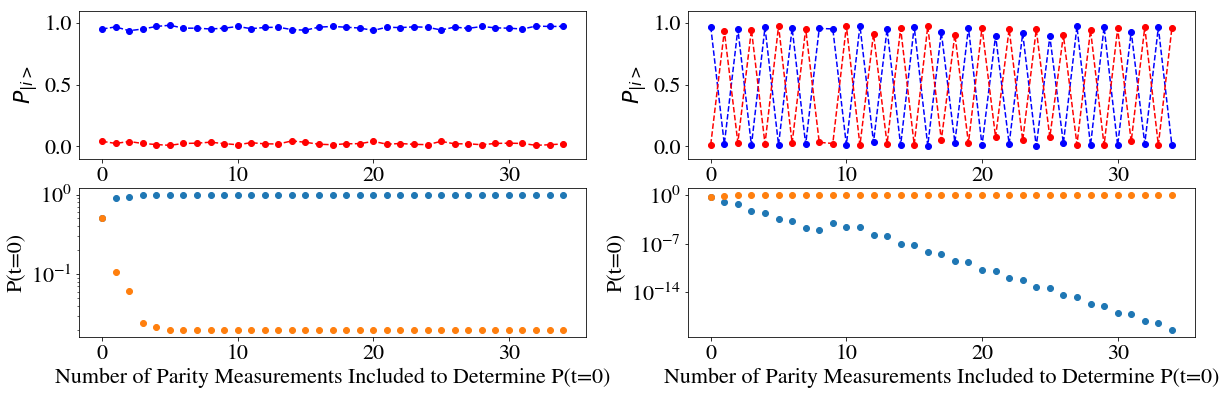

In [12]:
expt_name = 'repetitive_parity_measurement'
# filelist = [11,22] 5, 16, 28
filelist = [11,22]

        

figure(figsize = (20,6))
for kk,i in enumerate(filelist):
    filename = "..\\data\\" + str(i).zfill(5) + "_"+expt_name.lower()+".h5"
    with File(filename,'r') as a:

        hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
        experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
        quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
        expt_cfg = (json.loads(a.attrs['experiment_cfg']))[expt_name.lower()]
        nu_q = quantum_device_cfg['qubit'][expt_cfg['on_qubits'][0]]['freq']
        alpha = quantum_device_cfg['qubit'][expt_cfg['on_qubits'][0]]['anharmonicity']
        nu_r = quantum_device_cfg['readout']['freq']
        trigger_period = hardware_cfg['trigger']['period_us']
        alpha_len = expt_cfg['alpha_len']
        alpha_amp = expt_cfg['alpha_amp']
        print ('alpha len: ', alpha_len, ', alpha amp: ', alpha_amp)
        alpha = alpha_amp*0.008349770575467376*sqrt(2*pi)*alpha_len
        print ("cavity n: ", alpha**2)
        print ("trigger period =",trigger_period,"us")

        I,Q = array(a['I']),array(a['Q'])
        I,Q = I/2**15*ran,Q/2**15*ran
        
        qubit_state_prob_counts = []
        qubit_state_prob_IQ_counts = []
        for jj in range(len(I)):
            probs_I_counts = []
            probs_Q_counts = []
            probs_counts = []
            probs_IQ_counts = []
            for ii in range(len(centers[0:3])):
                    dist_I = abs(I[jj]-centers[ii][0])
                    dist_I_index = argmin(abs(bins-dist_I))
                    probs_I_counts.append(counts_I[ii][dist_I_index])
                    dist_Q = abs(Q[jj]-centers[ii][1])
                    dist_Q_index = argmin(abs(bins-dist_Q))
                    probs_Q_counts.append(counts_Q[ii][dist_Q_index])

                    dist = sqrt((I[jj]-centers[ii][0])**2 + (Q[jj]-centers[ii][1])**2)
                    dist_index = argmin(abs(bins-dist))
                    probs_counts.append(counts[ii][dist_index])
            probs_counts = probs_counts/sum(probs_counts)
            probs_IQ_counts = array(probs_I_counts)*array(probs_Q_counts)/sum(array(probs_I_counts)*array(probs_Q_counts))
            qubit_state_prob_counts.append(probs_counts)
            qubit_state_prob_IQ_counts.append(probs_IQ_counts)
        
        start = 10
        stop = -55
#         figure(figsize=(10,6))
        
        subplot(2,2,kk+1)
        plot(asarray(qubit_state_prob_counts).T[0][start:stop],'bo--')
        plot(asarray(qubit_state_prob_counts).T[1][start:stop],'ro--')
#         plot(asarray(qubit_state_prob_counts).T[2][start:stop],'go--')
        xlabel('Parity measurement Number')
        ylabel('$P_{|i>}$')
#         title('Qubit State Probability')
        ylim(-0.1,1.1)
#         legend(['g','e','f'], loc = 4)
        
        
        
#         subplot(311)
#         plot(asarray(qubit_state_prob_counts).T[0][start:stop],'bo--')
# #         plot(asarray(qubit_state_prob_IQ_counts).T[0][start:stop],'bo--')
#         xlabel('Parity measurement Number')
#         ylabel('$P_{|g>}$')
#         ylim(-0.1,1.1)
        
#         subplot(312)
#         plot(asarray(qubit_state_prob_counts).T[1][start:stop],'ro--')
#         xlabel('Parity measurement Number')
#         ylabel('$P_{|e>}$')
#         ylim(-0.1,1.1)
        
        meas_sequence = []
        g_state_prob_list = asarray(qubit_state_prob_counts).T[0][start:stop]
        e_state_prob_list = asarray(qubit_state_prob_counts).T[1][start:stop]
        f_state_prob_list = asarray(qubit_state_prob_counts).T[2][start:stop]
        f_flag = False
#                 for ii in range (len(g_state_prob_list)):
#                     if f_state_prob_list[ii]>0.5:
#                         f_flag = True
#                     if g_state_prob_list[ii]>0.5:
#                         state_sequence.append(0)
#                     else:
#                         state_sequence.append(1)
#                 state_seq_temp.append(state_sequence)

        for ii in range (len(g_state_prob_list)):
            if g_state_prob_list[ii]>0.5:
                meas_sequence.append(0)
            elif e_state_prob_list[ii]>0.5:
                meas_sequence.append(1)
            else:
                if ii == 0:
                    meas_sequence.append(0)
                else:
                    meas_sequence.append(meas_sequence[ii-1])
                    
                    
#         subplot(3,2,kk+3)
#         plot(meas_sequence,'go--')
        
# #         title('Flip Boolean')
#         ylim(-0.1,1.1)
#         tight_layout()
        
        P0_first = []
        P1_first = []
        for ii in range (len(meas_sequence)):
            temp_meas_sequence = meas_sequence[0:ii+1]
            gamma_matrix = gamma(temp_meas_sequence, T, E)
            P0_first.append(gamma_matrix[0,0] + gamma_matrix[0,1])
            P1_first.append(gamma_matrix[0,2] + gamma_matrix[0,3])
        
        subplot(2,2,kk+3)
        semilogy(P0_first, 'o', label= "P(n=0)")
        semilogy(P1_first, 'o', label= "P(n=1)")
#         axhline(1e-9)
#         plot(P0_first, 'o', label= "P(n=0)")
#         plot(P1_first, 'o', label= "P(n=1)")
#         axhline(1e-8)
#         ylim(1e-16,1e0)
        ylabel('P(t=0)')
        xlabel('Number of Parity Measurements Included to Determine P(t=0)')
#         legend()
        print(len(P1_first))
        
#     savefig('../figures/meas_seq_35meas_V2.pdf', format='pdf', dpi=1200)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide


35
77
35


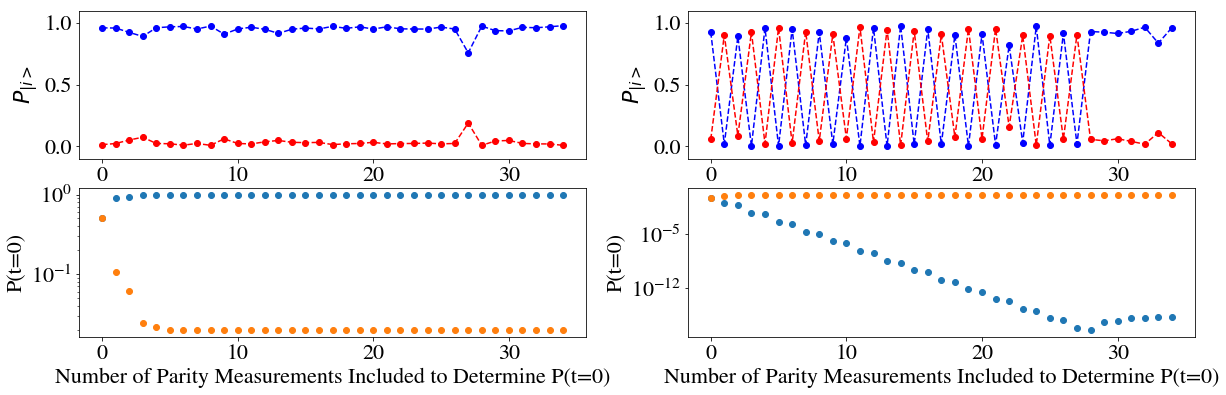

In [13]:
expt_name = 'sequential_repetitive_parity_measurement'
# filelist = [11,22] 5, 16, 28
filelist = [1,2]

        

figure(figsize = (20,6))
for kk,i in enumerate(filelist):
    filename = "..\\data\\" + str(i).zfill(5) + "_"+expt_name.lower()+".h5"
    with File(filename,'r') as a:

        hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
        experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
        quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
        expt_cfg = (json.loads(a.attrs['experiment_cfg']))['repetitive_parity_measurement']
        nu_q = quantum_device_cfg['qubit'][expt_cfg['on_qubits'][0]]['freq']
        alpha = quantum_device_cfg['qubit'][expt_cfg['on_qubits'][0]]['anharmonicity']
        nu_r = quantum_device_cfg['readout']['freq']
        trigger_period = hardware_cfg['trigger']['period_us']
        alpha_len = expt_cfg['alpha_len']
        alpha_amp = expt_cfg['alpha_amp']
#         print ('alpha len: ', alpha_len, ', alpha amp: ', alpha_amp)
        alpha = alpha_amp*0.008349770575467376*sqrt(2*pi)*alpha_len
#         print ("cavity n: ", alpha**2)
#         print ("trigger period =",trigger_period,"us")
        
        
        index = 77
        while (index<78):


            I,Q = array(a['I'][index,:]),array(a['Q'][index,:])
            I,Q = I/2**15*ran,Q/2**15*ran

            qubit_state_prob_counts = []
            qubit_state_prob_IQ_counts = []
            for jj in range(len(I)):
                probs_I_counts = []
                probs_Q_counts = []
                probs_counts = []
                probs_IQ_counts = []
                for ii in range(len(centers[0:3])):
                        dist_I = abs(I[jj]-centers[ii][0])
                        dist_I_index = argmin(abs(bins-dist_I))
                        probs_I_counts.append(counts_I[ii][dist_I_index])
                        dist_Q = abs(Q[jj]-centers[ii][1])
                        dist_Q_index = argmin(abs(bins-dist_Q))
                        probs_Q_counts.append(counts_Q[ii][dist_Q_index])

                        dist = sqrt((I[jj]-centers[ii][0])**2 + (Q[jj]-centers[ii][1])**2)
                        dist_index = argmin(abs(bins-dist))
                        probs_counts.append(counts[ii][dist_index])
                probs_counts = probs_counts/sum(probs_counts)
                probs_IQ_counts = array(probs_I_counts)*array(probs_Q_counts)/sum(array(probs_I_counts)*array(probs_Q_counts))
                qubit_state_prob_counts.append(probs_counts)
                qubit_state_prob_IQ_counts.append(probs_IQ_counts)

            start = 12
            stop = -53
    #         figure(figsize=(10,6))

            subplot(2,2,kk+1)
            plot(asarray(qubit_state_prob_counts).T[0][start:stop],'bo--')
            plot(asarray(qubit_state_prob_counts).T[1][start:stop],'ro--')
    #         plot(asarray(qubit_state_prob_counts).T[2][start:stop],'go--')
            xlabel('Parity measurement Number')
            ylabel('$P_{|i>}$')
    #         title('Qubit State Probability')
            ylim(-0.1,1.1)
    #         legend(['g','e','f'], loc = 4)



    #         subplot(311)
    #         plot(asarray(qubit_state_prob_counts).T[0][start:stop],'bo--')
    # #         plot(asarray(qubit_state_prob_IQ_counts).T[0][start:stop],'bo--')
    #         xlabel('Parity measurement Number')
    #         ylabel('$P_{|g>}$')
    #         ylim(-0.1,1.1)

    #         subplot(312)
    #         plot(asarray(qubit_state_prob_counts).T[1][start:stop],'ro--')
    #         xlabel('Parity measurement Number')
    #         ylabel('$P_{|e>}$')
    #         ylim(-0.1,1.1)

            meas_sequence = []
            g_state_prob_list = asarray(qubit_state_prob_counts).T[0][start:stop]
            e_state_prob_list = asarray(qubit_state_prob_counts).T[1][start:stop]
            f_state_prob_list = asarray(qubit_state_prob_counts).T[2][start:stop]
            f_flag = False
    #                 for ii in range (len(g_state_prob_list)):
    #                     if f_state_prob_list[ii]>0.5:
    #                         f_flag = True
    #                     if g_state_prob_list[ii]>0.5:
    #                         state_sequence.append(0)
    #                     else:
    #                         state_sequence.append(1)
    #                 state_seq_temp.append(state_sequence)

            for ii in range (len(g_state_prob_list)):
                if g_state_prob_list[ii]>0.5:
                    meas_sequence.append(0)
                elif e_state_prob_list[ii]>0.5:
                    meas_sequence.append(1)
                else:
                    if ii == 0:
                        meas_sequence.append(0)
                    else:
                        meas_sequence.append(meas_sequence[ii-1])


    #         subplot(3,2,kk+3)
    #         plot(meas_sequence,'go--')

    # #         title('Flip Boolean')
    #         ylim(-0.1,1.1)
    #         tight_layout()

            P0_first = []
            P1_first = []
            for ii in range (len(meas_sequence)):
                temp_meas_sequence = meas_sequence[0:ii+1]
                gamma_matrix = gamma(temp_meas_sequence, T, E)
                P0_first.append(gamma_matrix[0,0] + gamma_matrix[0,1])
                P1_first.append(gamma_matrix[0,2] + gamma_matrix[0,3])

            subplot(2,2,kk+3)
            semilogy(P0_first, 'o', label= "P(n=0)")
            semilogy(P1_first, 'o', label= "P(n=1)")
    #         plot(P0_first, 'o', label= "P(n=0)")
    #         plot(P1_first, 'o', label= "P(n=1)")
    #         axhline(1e-8)
#             ylim(1e-16,1e1)
            ylabel('P(t=0)')
            xlabel('Number of Parity Measurements Included to Determine P(t=0)')
    #         legend()

#             savefig('../figures/meas_seq_35meas_V2_2.pdf', format='pdf', dpi=1200)
            if (P1_first[-1]/P0_first[-1] > 1e7):
                print (index)
            index = index +1
            print(len(P1_first))

In [14]:
### print(nu_c)
print(nu_q)

4.749243755766327


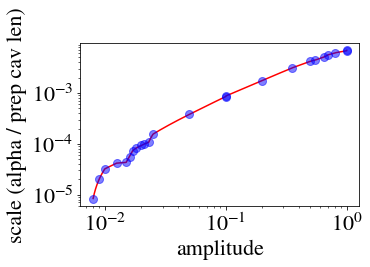

In [15]:
expt_name = '..\\drive_calibration\\00000_cavity_transfer_calibration'
filelist = [0]
from scipy import interpolate
import math
import scipy.special

for kk,i in enumerate(filelist):
    filename = expt_name.lower()+".h5"
    with File(filename,'r') as a:
        omegas = a['omegas']
        amps = a['amps']
        
        transfer_fn = interpolate.interp1d(omegas, amps)
        test_omega = np.arange(8.4e-6, 6.9e-3, 1e-7)
        fig = plt.figure(figsize=(5,3))
#         plt.plot(test_omega, transfer_fn(test_omega),'b-')
#         plt.loglog(omegas,amps, 'ro',alpha=0.5)
        plt.plot(transfer_fn(test_omega), test_omega,'r')
        plt.loglog(amps, omegas, 'bo', alpha=0.5, markersize = 8)
        plt.ylabel("scale (alpha / prep cav len)")
        plt.xlabel("amplitude")
        
# savefig('../figures/alpha_amp_cal.pdf', format='pdf', dpi=1200)

# ind = 8400
# print(len(test_omega))
# print(test_omega[ind], transfer_fn(test_omega[ind]))
# print(10*sqrt(2*pi)*test_omega[ind])
# axhline(test_omega[ind])

In [16]:
expt_name = 'sequential_repetitive_parity_measurement'
filelist = arange(359)
# filelist= [373]
p1_list = []
shows = ['I']
flip_sequence_list = []
state_sequence_list=[]
for ii,i in enumerate(filelist):
        
    filename = "..\\data\\" + str(i).zfill(5) + "_"+expt_name.lower()+".h5"
    with File(filename,'r') as a:

        hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
        experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
        quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
        expt_cfg = (json.loads(a.attrs['experiment_cfg']))['repetitive_parity_measurement']
        nu_q = quantum_device_cfg['qubit'][expt_cfg['on_qubits'][0]]['freq']
        alpha = quantum_device_cfg['qubit'][expt_cfg['on_qubits'][0]]['anharmonicity']
        nu_r = quantum_device_cfg['readout']['freq']
        trigger_period = hardware_cfg['trigger']['period_us']
        alpha_len = expt_cfg['alpha_len']
        alpha_amp = expt_cfg['alpha_amp']
        add_photon = expt_cfg['add_photon']
#         alpha = alpha_amp*0.008349770575467376*sqrt(2*pi)*alpha_len
        alpha = sqrt(2*pi)*alpha_len*test_omega[argmin(abs(transfer_fn(test_omega)-alpha_amp))]
        p1 = (alpha**2)*exp(alpha**2)
        
        if add_photon == False:
            p1 = 0.0
        state_seq_temp =[]
        I,Q = array(a['I']),array(a['Q'])
        I,Q = I/2**15*ran,Q/2**15*ran
        for kk in range (len(I)):
            I_temp = I[kk,:]
            Q_temp = Q[kk,:]
            qubit_state_prob_counts = []
            qubit_state_prob_IQ_counts = []
            for jj in range(len(I_temp)):
                probs_I_counts = []
                probs_Q_counts = []
                probs_counts = []
                probs_IQ_counts = []
                for ii in range(len(centers[0:3])):
                        dist_I = abs(I_temp[jj]-centers[ii][0])
                        dist_I_index = argmin(abs(bins-dist_I))
                        probs_I_counts.append(counts_I[ii][dist_I_index])
                        dist_Q = abs(Q_temp[jj]-centers[ii][1])
                        dist_Q_index = argmin(abs(bins-dist_Q))
                        probs_Q_counts.append(counts_Q[ii][dist_Q_index])

                        dist = sqrt((I_temp[jj]-centers[ii][0])**2 + (Q_temp[jj]-centers[ii][1])**2)
                        dist_index = argmin(abs(bins-dist))
                        probs_counts.append(counts[ii][dist_index])
                probs_counts = probs_counts/sum(probs_counts)
                probs_IQ_counts = array(probs_I_counts)*array(probs_Q_counts)/sum(array(probs_I_counts)*array(probs_Q_counts))
                qubit_state_prob_counts.append(probs_counts)
                qubit_state_prob_IQ_counts.append(probs_IQ_counts)

            start = 0
            stop = -2
#             figure(figsize=(18,3))
#             plot(asarray(qubit_state_prob_counts).T[0][start:stop],'bo--')
#             plot(asarray(qubit_state_prob_counts).T[1][start:stop],'ro--')
#             xlabel('Parity measurement Number')
#             ylabel('Qubit State Probability')
#             legend(['g','e'], loc = (0.94,0.25))

#             figure(figsize=(18,6))
#             subplot(311)
#             plot(asarray(qubit_state_prob_counts).T[0][start:stop],'bo--')
#             xlabel('Parity measurement Number')
#             ylabel('$P_{|g>}$')
#             ylim(-0.1,1.1)

#             subplot(312)
#             plot(asarray(qubit_state_prob_counts).T[1][start:stop],'ro--')
#             xlabel('Parity measurement Number')
#             ylabel('$P_{|e>}$')
#             ylim(-0.1,1.1)

#             flip_sequence = []
#             for ii in range (len(asarray(qubit_state_prob_counts).T[0][start:stop])-1):
#                 if abs(asarray(qubit_state_prob_counts).T[0][ii+1] - asarray(qubit_state_prob_counts).T[0][ii])>0.5:
#                     flip_sequence.append(1)
#                 else:
#                     flip_sequence.append(0)
# #             print(flip_sequence)
#             flip_sequence_list.append(flip_sequence)

            state_sequence = []
            g_state_prob_list = asarray(qubit_state_prob_counts).T[0][start:stop]
            e_state_prob_list = asarray(qubit_state_prob_counts).T[1][start:stop]
            f_state_prob_list = asarray(qubit_state_prob_counts).T[2][start:stop]
            f_flag = False
#                 for ii in range (len(g_state_prob_list)):
#                     if f_state_prob_list[ii]>0.5:
#                         f_flag = True
#                     if g_state_prob_list[ii]>0.5:
#                         state_sequence.append(0)
#                     else:
#                         state_sequence.append(1)
#                 state_seq_temp.append(state_sequence)

            for ii in range (len(g_state_prob_list)):
                if g_state_prob_list[ii]>0.5:
                    state_sequence.append(0)
                elif e_state_prob_list[ii]>0.5:
                    state_sequence.append(1)
                else:
                    if ii == 0:
                        state_sequence.append(0)
                    else:
                        state_sequence.append(state_sequence[ii-1])
            state_seq_temp.append(state_sequence)

#             subplot(313)
#             plot(flip_sequence,'go--')
#             xlabel('Parity measurement Number')
#             ylabel('Flip Boolean')
#             ylim(-0.1,1.1)
#             tight_layout()
        if not f_flag:
            p1_list.append(p1)
            state_sequence_list.append(state_seq_temp)

state_dict = {}
for ii, elem in enumerate(p1_list):
    if elem in state_dict:
        state_dict[elem] = state_dict[elem] + state_sequence_list[ii]
    else:
        state_dict[elem] = state_sequence_list[ii]
print (state_dict.keys())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


dict_keys([0.082256839612458957, 0.36751853849630745, 0.01135324397826302, 0.0072367692721696641, 0.0040579069409568749, 0.028202605718902044, 0.001799469308404296, 5.8268652271955149e-06, 0.017782789719525745, 0.01228339687027276, 0.00056499132176473772, 2.7708854882465167e-07, 0.0, 4.8491476692423328e-05])


In [17]:
alpha = 0.02*0.008349770575467376*sqrt(2*pi)*30
p1 = (alpha**2)*exp(alpha**2)
print(p1)

0.000157724784472


In [141]:
# closer inspection
expt_name = 'sequential_repetitive_parity_measurement'
filelist = arange(359,374)
# filelist= [365,366,367]
p1_list = []
shows = ['I']
flip_sequence_list = []
state_sequence_list=[]
for ii,i in enumerate(filelist):
        
    filename = "..\\data\\" + str(i).zfill(5) + "_"+expt_name.lower()+".h5"
    with File(filename,'r') as a:

        hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
        experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
        quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
        expt_cfg = (json.loads(a.attrs['experiment_cfg']))['repetitive_parity_measurement']
        nu_q = quantum_device_cfg['qubit'][expt_cfg['on_qubits'][0]]['freq']
        alpha = quantum_device_cfg['qubit'][expt_cfg['on_qubits'][0]]['anharmonicity']
        nu_r = quantum_device_cfg['readout']['freq']
        trigger_period = hardware_cfg['trigger']['period_us']
        alpha_len = expt_cfg['alpha_len']
        alpha_amp = expt_cfg['alpha_amp']
        add_photon = expt_cfg['add_photon']
#         print ('alpha len: ', alpha_len, ', alpha amp: ', alpha_amp)
#         alpha = alpha_amp*0.008349770575467376*sqrt(2*pi)*alpha_len
        alpha = sqrt(2*pi)*alpha_len*test_omega[argmin(abs(transfer_fn(test_omega)-alpha_amp))]
#         print ("cavity n: ", alpha**2)
        p1 = (alpha**2)*exp(alpha**2)
        
#         print ("prob n=1: ", p1)
#         print ("trigger period =",trigger_period,"us")
        if True:
            state_seq_temp =[]
            I,Q = array(a['I']),array(a['Q'])
            I,Q = I/2**15*ran,Q/2**15*ran
            for kk in range (len(I)):
                I_temp = I[kk,:]
                Q_temp = Q[kk,:]
                qubit_state_prob_counts = []
                qubit_state_prob_IQ_counts = []
                for jj in range(len(I_temp)):
                    probs_I_counts = []
                    probs_Q_counts = []
                    probs_counts = []
                    probs_IQ_counts = []
                    for ii in range(len(centers[0:3])):
                            dist_I = abs(I_temp[jj]-centers[ii][0])
                            dist_I_index = argmin(abs(bins-dist_I))
                            probs_I_counts.append(counts_I[ii][dist_I_index])
                            dist_Q = abs(Q_temp[jj]-centers[ii][1])
                            dist_Q_index = argmin(abs(bins-dist_Q))
                            probs_Q_counts.append(counts_Q[ii][dist_Q_index])

                            dist = sqrt((I_temp[jj]-centers[ii][0])**2 + (Q_temp[jj]-centers[ii][1])**2)
                            dist_index = argmin(abs(bins-dist))
                            probs_counts.append(counts[ii][dist_index])
                    probs_counts = probs_counts/sum(probs_counts)
                    probs_IQ_counts = array(probs_I_counts)*array(probs_Q_counts)/sum(array(probs_I_counts)*array(probs_Q_counts))
                    qubit_state_prob_counts.append(probs_counts)
                    qubit_state_prob_IQ_counts.append(probs_IQ_counts)

                start = 10
                stop = -60
    #             figure(figsize=(18,3))
    #             plot(asarray(qubit_state_prob_counts).T[0][start:stop],'bo--')
    #             plot(asarray(qubit_state_prob_counts).T[1][start:stop],'ro--')
    #             xlabel('Parity measurement Number')
    #             ylabel('Qubit State Probability')
    #             legend(['g','e'], loc = (0.94,0.25))

    #             figure(figsize=(18,6))
    #             subplot(311)
    #             plot(asarray(qubit_state_prob_counts).T[0][start:stop],'bo--')
    #             xlabel('Parity measurement Number')
    #             ylabel('$P_{|g>}$')
    #             ylim(-0.1,1.1)

    #             subplot(312)
    #             plot(asarray(qubit_state_prob_counts).T[1][start:stop],'ro--')
    #             xlabel('Parity measurement Number')
    #             ylabel('$P_{|e>}$')
    #             ylim(-0.1,1.1)

    #             flip_sequence = []
    #             for ii in range (len(asarray(qubit_state_prob_counts).T[0][start:stop])-1):
    #                 if abs(asarray(qubit_state_prob_counts).T[0][ii+1] - asarray(qubit_state_prob_counts).T[0][ii])>0.5:
    #                     flip_sequence.append(1)
    #                 else:
    #                     flip_sequence.append(0)
    # #             print(flip_sequence)
    #             flip_sequence_list.append(flip_sequence)

                state_sequence = []
                g_state_prob_list = asarray(qubit_state_prob_counts).T[0][start:stop]
                e_state_prob_list = asarray(qubit_state_prob_counts).T[1][start:stop]
                f_state_prob_list = asarray(qubit_state_prob_counts).T[2][start:stop]
                f_flag = False
                for ii in range (len(g_state_prob_list)):
                    if g_state_prob_list[ii]>0.5:
                        state_sequence.append(0)
                    elif e_state_prob_list[ii]>0.5:
                        state_sequence.append(1)
                    else:
                        if ii == 0:
                            state_sequence.append(0)
                        else:
                            state_sequence.append(state_sequence[ii-1])
                state_seq_temp.append(state_sequence)

    #             subplot(313)
    #             plot(flip_sequence,'go--')
    #             xlabel('Parity measurement Number')
    #             ylabel('Flip Boolean')
    #             ylim(-0.1,1.1)
    #             tight_layout()
            if not f_flag:
                p1_list.append(p1)
                state_sequence_list.append(state_seq_temp)

state_dict2 = {}
for ii, elem in enumerate(p1_list):
    if elem in state_dict2:
        state_dict2[elem] = state_dict2[elem] + state_sequence_list[ii]
    else:
        state_dict2[elem] = state_sequence_list[ii]
print (state_dict2.keys())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide


dict_keys([0.01135324397826302, 0.01228339687027276, 0.0040579069409568749, 0.0072367692721696641])


In [18]:
from scipy.optimize import curve_fit

def fitgeneral(xdata, ydata, fitfunc, fitparams, domain=None, showfit=False, showstartfit=False, showdata=True,
               label="", mark_data='bo', mark_fit='r-'):
    """Uses optimize.leastsq to fit xdata ,ydata using fitfunc and adjusting fit params"""

    # sort data
    order = np.argsort(xdata)
    xdata = xdata[order]
    ydata = ydata[order]

    if domain is not None:
        fitdatax,fitdatay = selectdomain(xdata,ydata,domain)
    else:
        fitdatax=xdata
        fitdatay=ydata
#    print 'minimum', np.min(fitdatay)
#    ymin=np.min(fitdatay)
    errfunc = lambda p, x, y: (fitfunc(p,x) - y) #there shouldn't be **2 # Distance to the target function
    startparams=fitparams # Initial guess for the parameters
    bestfitparams, cov_params = optimize.leastsq(errfunc, startparams[:], args=(fitdatax,fitdatay))
    if showfit:
        if showdata:
            plt.plot(fitdatax,fitdatay,mark_data,label=label+" data")
        if showstartfit:
            plt.plot(fitdatax,fitfunc(startparams,fitdatax),label=label+" startfit")
        plt.plot(fitdatax,fitfunc(bestfitparams,fitdatax),mark_fit,label=label+" fit")
        if label!='': plt.legend()
        err=math.fsum(errfunc(bestfitparams,fitdatax,fitdatay))
        #print 'the best fit has an RMS of {0}'.format(err)
#    plt.t
#    plt.figtext()    
    return bestfitparams, cov_params

def photon_counter(p, x):
    return p[0]*(x)+p[1]

def photon_counter_fit(xdata,ydata,fitparams=None,domain=None,showfit=False,showstartfit=False,label=""):
    """Fits form: p[0]*(x)+p[1]"""
    if domain is not None:
        fitdatax,fitdatay = selectdomain(xdata,ydata,domain)
    else:
        fitdatax=xdata
        fitdatay=ydata
    if fitparams is None:    
                
        fitparams=[0, 0]
        fitparams[0] = 0.5
        fitparams[1] = 1e-4
        
    errfunc=lambda p,x, y: (photon_counter(p,x) -y)
    #print "fitparams: ",fitparams
#     p1, p1_cov = fitgeneral(fitdatax, fitdatay, func, fitparams, domain=None, showfit=showfit, showstartfit=showstartfit,
#                     label=label)
    p1, p1_cov = optimize.leastsq(errfunc, fitparams, args=(fitdatax,fitdatay))

    return p1, p1_cov

def photon_counter_line(x, eff, err):
    return eff*(x)+err

Expected Counts 32.903
n_inj: 0.0822568, N: 400.0
Expected Counts 0.036
n_inj: 0.0000058, N: 6186.0


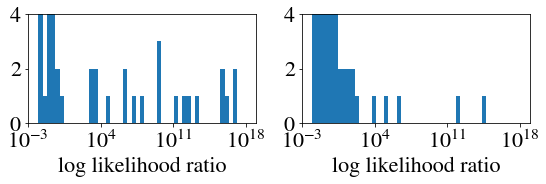

In [50]:
save_figs = False

start = 10
stop = 40

thresh = 1e4

L_ratio = {}
for p1 in state_dict:
    state_list = state_dict[p1]
    meas_num_dict[p1] = len(state_list)
    first_detected_state_list = []
    L_ratio_list = []
    for ii in range (len(state_list)):
        meas_seq = state_list[ii][start:stop]
        gamma_matrix = gamma(meas_seq, T, E)

        P0 = gamma_matrix[:,0] + gamma_matrix[:,1]
        P1 = gamma_matrix[:,2] + gamma_matrix[:,3]

        # Compare the probabilities of the two models to obtain a likelihood ratio
        likelihood_ratio_first = P1[0]/P0[0]
#         if likelihood_ratio_first > thresh:
        L_ratio_list.append(likelihood_ratio_first)

    L_ratio[p1] = L_ratio_list

for dic in [L_ratio]:
    del dic[2.7708854882465167e-07]
    del dic[0.01228339687027276]
    
figure(figsize = (9,2))
# for p1 in L_ratio.keys():
for ii,p1 in enumerate([0.082256839612458957,5.8268652271955149e-06], start = 1):
    print("Expected Counts %.3f" %(p1*len(L_ratio[p1])))
    print("n_inj: %.7f, N: %.1f" %(p1, len(L_ratio[p1])))
#     axvline(thresh)
#     title("n_inj: %.7f, N: %.1f" %(p1, len(L_ratio[p1])))
    subplot(1,2,ii)
    hist(L_ratio[p1], bins=logspace(-2,18,50))
    xscale('log')
    ylim(0,4)
    xlabel("log likelihood ratio")
#     ylabel("counts")

if save_figs:
    savefig('../figures/hist_nth.pdf', format='pdf', dpi=1200)


In [325]:
print(L_ratio.keys())

dict_keys([0.082256839612458957, 0.36751853849630745, 0.01135324397826302, 0.0072367692721696641, 0.0040579069409568749, 0.028202605718902044, 0.001799469308404296, 5.8268652271955149e-06, 0.017782789719525745, 0.00056499132176473772, 0.0, 4.8491476692423328e-05])


In [47]:
start = 10
stop = 40

# threshold_list = [1,2,5,10,20,1e2,4e2,1e3,2e3,1e4,4e4,1e5,4e5,1e6,4e6,1e7,4e7,1e8,1e9]
# threshold_list = [1,2,5,10,20,1e2,2e2,4e2,7e2,1e3,2e3,7e3,1e4,2e4,4e4,1e5]
# threshold_list = [500,800,1000,1200,1300,1400,1500,1800,2000,10000]
# threshold_list = [1e5,1e6,1e7,1e8,1e9]
threshold_list = [1e5]

first_count_dict_list = []
count_dict_list = []
meas_num_dict_list = []
for thresh in threshold_list:
    first_count_dict = {}
    count_dict = {}
    meas_num_dict = {}
    for p1 in state_dict:
        state_list = state_dict[p1]
        meas_num_dict[p1] = len(state_list)
        max_detected_state_list = []
        first_detected_state_list = []
        max_L = []
        for ii in range (len(state_list)):
            meas_seq = state_list[ii][start:stop]
            gamma_matrix = gamma(meas_seq, T, E)

            P0 = gamma_matrix[:,0] + gamma_matrix[:,1]
            P1 = gamma_matrix[:,2] + gamma_matrix[:,3]

            # Compare the probabilities of the two models to obtain a likelihood ratio
            likelihood_ratio = P1/P0        
            max_L.append(max(likelihood_ratio))
            if max(likelihood_ratio)>thresh:
                max_detected_state_list.append(1)
            else:
                max_detected_state_list.append(0)
                
            if likelihood_ratio[0]>thresh:
                first_detected_state_list.append(1)
            else:
                first_detected_state_list.append(0)
        first_count_dict[p1] = sum(first_detected_state_list)
        count_dict[p1] = sum(max_detected_state_list)

    for dic in [first_count_dict, count_dict, meas_num_dict]:
        del dic[2.7708854882465167e-07]
        del dic[0.01228339687027276]
    first_count_dict_list.append(first_count_dict)
    count_dict_list.append(count_dict)
    meas_num_dict_list.append(meas_num_dict)
#     print(count_dict.values())
#     print(meas_num_dict.values())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:2876: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


[0.40935133276276747]
[0.055055726479860505]
[0.00043215570426591228]
[0.00011252111893869571]
threshod = 100000.00
Background Photon Number: 0.001056 +/- 0.000266
Effective Squeezing below Quantum Limit: 14.88 +/- 0.55


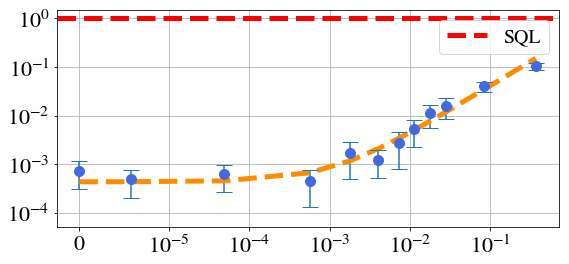

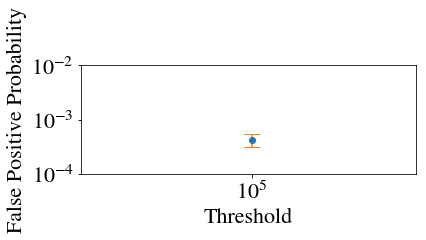

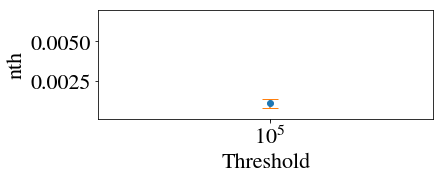

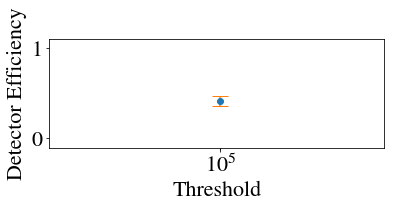

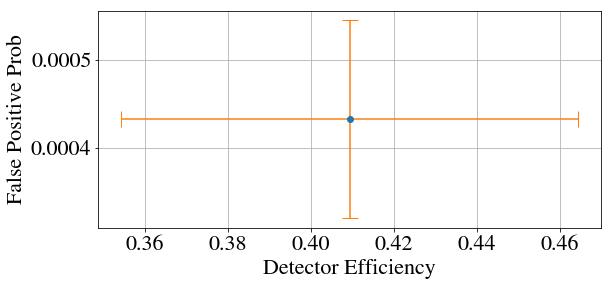

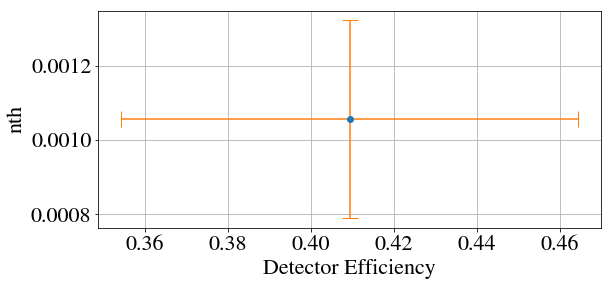

In [113]:
# threshold_list = [1,2,5,10,20,1e2,4e2,1e3,2e3,1e4,4e4,1e5,4e5,1e6,4e6,1e7,4e7,1e8,1e9]
# threshold_list = [1,2,5,10,20,1e2,2e2,4e2,7e2,1e3,2e3,7e3,1e4,2e4,4e4,1e5]
# threshold_list = [500,800,1000,1200,1300,1400,1500,1800,2000,10000]
# threshold_list = [1e5,1e6,1e7,1e8,1e9]
threshold_list = [1e5]

save_figs = False
figure(figsize = (9,4))
SQL = 1
axhline(SQL, linewidth = 5, linestyle = '--', color = 'red', label = "SQL")
nth_list = []
nth_err_list = []
nth_fit_list = []
nth_fit_err_list = []
eff_list = []
eff_err_list = []

N_counts = []

threshold_list_temp = threshold_list
# print(threshold_list_temp)

for ii in range (len(threshold_list_temp)):

    p1_list = asarray(list(count_dict_list[ii].keys()))
    photon_first_count = asarray([x for _,x in sorted(zip(p1_list,first_count_dict_list[ii].values()))])
    photon_count = asarray([x for _,x in sorted(zip(p1_list,count_dict_list[ii].values()))])
    num_meas = asarray([x for _,x in sorted(zip(p1_list,meas_num_dict_list[ii].values()))])
    p1_list = sort(p1_list)

    err_meas = sqrt(photon_first_count/num_meas*(1-photon_first_count/num_meas) / num_meas)
    err_pred = sqrt(p1_list*(1-p1_list)/num_meas)
    
    for ii in range(len(err_meas)):
        if err_meas[ii] == 0:
            err_meas[ii] = sqrt(p1_list[ii]) + 1e-4

    # errorbar(p1_list, p1_list, yerr = err_pred, fmt=None, ecolor='darkorange', capsize = 12)
    # plot(p1_list, p1_list, 'o', color = 'darkorange', markersize = 10,label = "Predicted Photon Probability")
#     errorbar(p1_list, photon_count/num_meas, yerr = err_meas, fmt=None, ecolor= 'royalblue', capsize = 12)
#     plot(p1_list, photon_count/num_meas, 'o', color = 'royalblue', markersize = 10, label = "Measured Photon Probability")
#     errorbar(p1_list, photon_count/num_meas, yerr = err_meas, fmt=None, ecolor= 'royalblue', capsize = 12)
#     plot(p1_list, photon_count/num_meas, 'o', markersize = 10, label = "Threshold = " + str(threshold_list[ii]))
    
#     plot(p1_list, photon_first_count/num_meas, 'o', markersize = 10, color = 'royalblue', label = "Threshold = " + str(threshold_list[ii]))
    

    
    fit_start = 0
    fit_stop = -1
#     popt, popt_cov = photon_counter_fit(p1_list[fit_start:fit_stop],photon_first_count[fit_start:fit_stop]/num_meas[fit_start:fit_stop],
#                            fitparams = [0.5, abs(photon_count[-1]/num_meas[-1])], showfit=False)
    
#     plot(p1_list, photon_counter(popt, p1_list),color = 'darkorange', linestyle ='--', linewidth = 5)
#     print(p)
    
    popt, pcov = curve_fit(photon_counter_line, p1_list[fit_start:fit_stop],
                           photon_first_count[fit_start:fit_stop]/num_meas[fit_start:fit_stop], 
                           sigma = err_meas[fit_start:fit_stop], bounds = ([0.1,1e-5],[0.75,1e-2]))
    
#     bounds = ([0.1,2e-4],[1,1])
    
    plot(p1_list, photon_counter_line(p1_list, *popt),color = 'darkorange', linestyle ='--', linewidth = 5)

#     errorbar(p1_list, photon_count/num_meas, yerr = err_meas, fmt=None, ecolor= 'royalblue', capsize = 12)
#     plot(p1_list, photon_first_count/num_meas, 'o', markersize = 10, color = 'royalblue')

    errorbar(p1_list, photon_first_count/num_meas, yerr = err_meas, fmt=None, capsize = 8)
    plot(p1_list, photon_first_count/num_meas, 'o', color = 'royalblue', markersize = 10, marker = 'o')

    xscale('symlog', linthreshx = 10**(-5.0))
    yscale('symlog', linthreshy = 10**(-5.0))

#     xlim(1e-5,1)
    ylim(5e-5,1.5)
    
    eff = popt[0]
    eff_list.append(eff)
    eff_err_list.append(sqrt(pcov[0][0]))

    
    n_th_fit = popt[1]
    nth_fit_list.append(n_th_fit)
    n_th_fit_err = sqrt(pcov[1][1])
    nth_fit_err_list.append(n_th_fit_err)
    n_th = (photon_first_count[0]/num_meas[0])
    n_th_err = err_meas[0]
    nth_list.append(n_th)
    nth_err_list.append(n_th_err)
    
    N_counts.append(photon_first_count)
    
#     axhline(cavity_p1, linestyle ='--', linewidth = 3, color = 'seagreen', label = "rabi predicted cavity heating")
#     axhline(nth, linestyle ='--', linewidth = 3, color = 'lightcoral', label = "cavity heating lower limit")


    # print ('Photon Count List', [x for _,x in sorted(zip(p1_list,photon_count))])
    # print ('Expected Photon Count', [x for _,x in sorted(zip(p1_list,p1_list*num_meas))])
    # print ('Number of Measurements', [x for _,x in sorted(zip(p1_list,num_meas))])
    # print('Injected P1', sort(p1_list))

    def temperature_c(nu,occ):
        Kb = 1.38e-23
        h = 6.626e-34
        return h*nu/(Kb*log(1/occ+1))
    
#     print ("P $(n=1)$ = ",popt[1]/popt[0])
#     print ("Cavity Temp:" , 1e3*temperature_c(nu_c*1e9,popt[1]/popt[0])," mK" )
    # print ("Cavity Excited State Occupation:" , occupation_q(nu_c,1e3*temperature_q(nu_c,ratio)))

# xlabel("P(n = 1) injected", fontsize = 35)
# ylabel("P(n = 1) measured", fontsize = 35)


# title("Single Photon Counter", fontsize = 35)
legend(fontsize = 20)
grid()
# savefig('../figures/photon_counting_nolabel.pdf', format='pdf', dpi=1200)
if save_figs:
    savefig('../figures/photon_counting_1e5.pdf', format='pdf', dpi=1200)

    
# print(nth_list)
# print(nth_fit_list)
# print(nth_err_list)
# print(nth_fit_err_list)
# print(eff_list)
# print(eff_err_list)

# print(asarray(nth_list)/asarray(eff_list))
# print(asarray(nth_fit_list)/asarray(eff_list))

n_back = asarray(nth_fit_list)/asarray(eff_list)
n_back_err = sqrt( (1//asarray(eff_list))**2 * (asarray(nth_fit_err_list))**2 + (asarray(nth_fit_list)/(asarray(eff_list))**2)**2 * (asarray(eff_err_list))**2)


threshold_list = threshold_list_temp

figure(figsize = (6,2))
# plot(threshold_list, nth_list, 'o')
# errorbar(threshold_list, nth_list, yerr = nth_err_list, fmt=None, capsize = 8)
plot(threshold_list, nth_fit_list, 'o')
errorbar(threshold_list, nth_fit_list, yerr = nth_fit_err_list, fmt=None, capsize = 8)
xscale('symlog', linthreshx = 10**(-4.0))
yscale('symlog', linthreshy=10**(-4.0))
xlabel("Threshold")
ylabel("False Positive Probability")
# title("False Positive Probablity")
ylim(1e-4,1e-2)
# grid()
if save_figs:
    savefig('../figures/falseprob_threshold_25meas.pdf', format='pdf', dpi=1200)
    
figure(figsize = (6,2))
plot(threshold_list, n_back, 'o')
errorbar(threshold_list, n_back, yerr = n_back_err, fmt=None, capsize = 8)
xscale('symlog', linthreshx = 10**(-4.0))
# yscale('symlog', linthreshy=10**(-4.0))
ylim(1e-4,7e-3)
# grid()
xlabel("Threshold")
ylabel("nth")
# title("False Positive Probablity")
# grid()
if save_figs:
    savefig('../figures/nth_threshold_25meas.pdf', format='pdf', dpi=1200)
    

    
figure(figsize = (6,2))
plot(threshold_list, eff_list, 'o')
errorbar(threshold_list, eff_list, yerr = eff_err_list, fmt=None, capsize = 8)
xscale('symlog', linthreshx = 10**(-4.0))
# yscale('symlog', linthreshy=10**(-4.0))
xlabel("Threshold")
ylabel("Detector Efficiency")
ylim(-0.1,1.1)
# title("False Positive Probablity")
# grid()
if save_figs:
    savefig('../figures/efficiency_threshold_25meas.pdf', format='pdf', dpi=1200)
    
figure(figsize = (9,4))
# plot(eff_list, nth_list, 'o')
# errorbar(eff_list, nth_list, xerr = eff_err_list, yerr = nth_err_list, fmt=None, capsize = 8)
plot(eff_list, nth_fit_list, 'o')
errorbar(eff_list, nth_fit_list, xerr = eff_err_list, yerr = nth_fit_err_list, fmt=None, capsize = 8)
# xscale('symlog')
# yscale('symlog', linthreshy=10**(-4.0))
# ylim(0.2,0.8)
ylabel("False Positive Prob")
xlabel("Detector Efficiency")
# title("False Positive Probablity")
grid()
if save_figs:
    savefig('../figures/efficiency_fp_25meas.pdf', format='pdf', dpi=1200)
    
figure(figsize = (9,4))

plot(eff_list, n_back, 'o')
errorbar(eff_list, n_back, xerr = eff_err_list, yerr = n_back_err, fmt=None, capsize = 8)
# xscale('symlog')
# yscale('symlog', linthreshy=10**(-4.0))
# ylim(0.2,0.8)
ylabel("nth")
xlabel("Detector Efficiency")
# title("False Positive Probablity")
grid()
if save_figs:
    savefig('../figures/efficiency_fp_25meas.pdf', format='pdf', dpi=1200)


print(eff_list)
print(eff_err_list)
print(nth_fit_list)
print(nth_fit_err_list)
    
index = -1
print("threshod = %.2f" %(threshold_list[index]))
print("Background Photon Number: %.6f +/- %.6f" %(n_back[index],n_back_err[index]))
sq_eff = -10*log10(sqrt(n_back[index]))
sq_eff_err = 5/log(10) * 1/n_back[index] * n_back_err[index]
print("Effective Squeezing below Quantum Limit: %.2f +/- %.2f" %(sq_eff,sq_eff_err))

In [59]:
from scipy.stats import power_divergence

In [104]:
#calculate R-squared value for fit

ydata = photon_first_count[fit_start:fit_stop]/num_meas[fit_start:fit_stop]
xdata = p1_list[fit_start:fit_stop]
sigma = err_meas[fit_start:fit_stop]

residuals = ydata - photon_counter_line( xdata, *popt)

ss_res = sum(residuals**2)

ss_tot = sum((ydata - mean(ydata))**2)

r_squared = 1 - (ss_res/ss_tot)

print(r_squared)

0.95648610919


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:2876: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


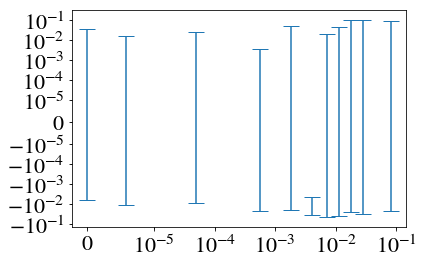

In [101]:
errorbar(xdata, residuals/sqrt(photon_counter_line( xdata, *popt)), yerr = sigma/sqrt(photon_counter_line( xdata, *popt)), fmt=None, capsize = 8)
xscale('symlog', linthreshx = 10**(-5.0))
yscale('symlog', linthreshy = 10**(-5.0))

In [105]:
#compute chi-squared and p-value
power_divergence(f_obs = ydata, f_exp = photon_counter_line( xdata, *popt), lambda_='pearson')

Power_divergenceResult(statistic=0.0048280972052518164, pvalue=0.99999999999999933)

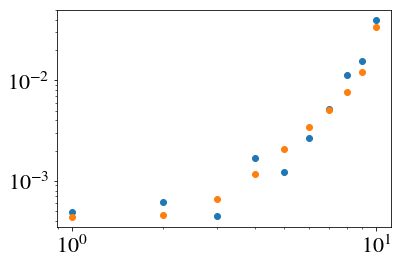

In [85]:
loglog(ydata, 'o')
loglog(photon_counter_line( xdata, *popt), 'o')

In [114]:
# print(N_counts)
# print(num_meas)
# print(eff_list)
for ii in range(len(N_counts)):
#     print (sum(N_counts[ii][0:3])/sum(num_meas[0:3]) * 1/(eff_list[ii]))
    print (sum(N_counts[ii][0:3]) * 1/(eff_list[ii]))
    print(sum(N_counts[ii][0:3]))

print(sum(num_meas[0:3]))
print(7.3e-4*sum(num_meas[0:3]))
print(eff_list)
print(threshold_list)

21.9860039034
9
15141
11.05293
[0.40935133276276747]
[100000.0]


## calculate moments of photon count distribution

In [141]:
start = 10
stop = 40

thresh = 1e5

first_count_dict = {}
count_dict = {}
meas_num_dict = {}
count_stream_dict = {}
for p1 in state_dict:
    state_list = state_dict[p1]
    meas_num_dict[p1] = len(state_list)
    max_detected_state_list = []
    first_detected_state_list = []
    max_L = []
    for ii in range (len(state_list)):
        meas_seq = state_list[ii][start:stop]
        gamma_matrix = gamma(meas_seq, T, E)

        P0 = gamma_matrix[:,0] + gamma_matrix[:,1]
        P1 = gamma_matrix[:,2] + gamma_matrix[:,3]

        # Compare the probabilities of the two models to obtain a likelihood ratio
        likelihood_ratio = P1/P0        
#         max_L.append(max(likelihood_ratio))
#         if max(likelihood_ratio)>thresh:
#             max_detected_state_list.append(1)
#         else:
#             max_detected_state_list.append(0)

        if likelihood_ratio[0]>thresh:
            first_detected_state_list.append(1)
        else:
            first_detected_state_list.append(0)
    count_stream_dict[p1] = first_detected_state_list
#     first_count_dict[p1] = sum(first_detected_state_list)
#     count_dict[p1] = sum(max_detected_state_list)

for dic in [count_stream_dict, meas_num_dict]:
    del dic[2.7708854882465167e-07]
    del dic[0.01228339687027276]

In [204]:
print(sort(p1_list))

[  0.00000000e+00   5.82686523e-06   4.84914767e-05   5.64991322e-04
   1.79946931e-03   4.05790694e-03   7.23676927e-03   1.13532440e-02
   1.77827897e-02   2.82026057e-02   8.22568396e-02   3.67518538e-01]


In [481]:
p1_list = asarray(list(count_stream_dict.keys()))
p1_list = sort(p1_list)
# count_stream_list = asarray([count_stream_dict[p1_list[0]],count_stream_dict[p1_list[1]],count_stream_dict[p1_list[2]]])
count_stream_list = asarray([count_stream_dict[p1_list[11]]])

In [482]:
count_stream = []
# for ii in range(3):
#     count_stream = count_stream + count_stream_list[ii][:]

count_stream = count_stream_list[0][:]
print(shape(count_stream))

(356,)


In [483]:
N_wait = []
counter = 0
for ii in range(len(count_stream)):
    if count_stream[ii] == 1:
        N_wait.append(counter)
        counter=0
    else:
        counter +=1
N_wait=asarray(N_wait)
N_wait = N_wait.astype(float32)
count_stream = asarray(count_stream)

[82.0, 8039.5, 856838.5]
[4.5276927947998047, 925.65570068359375, 157488.59765625]
[  8.90000000e+01   1.58420000e+04   3.52484500e+06]


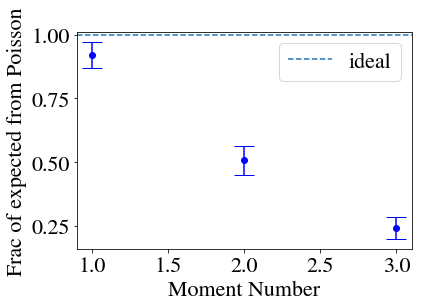

In [484]:
#aarivl times are distributed as a gamma distribution with mean=1/mu , var = 1/mu^2
# print(N_wait)
N_wait_hist, bin_edges=histogram(N_wait, bins=50)
moment_num = []
moments = []
moments_err = []
gamma_m1 = float(len(count_stream)/(sum(count_stream)))
gamma_m2 = gamma_m1**2 + gamma_m1**2 #2nd moment is Var = E[X^2] - E[X]^2
gamma_m3 = gamma_m1**3 + 3*gamma_m2*gamma_m1 - 2*gamma_m1**3 #3rd moment is skew = E[X^3] + 3E[X^2]E[X] + 2E[X]^3
# gamma_m4 = gamma_m1**4+ 4*gamma_m3*gamma_m1 -6*gamma_m2**2 + 3*gamma_m1**4
gamma_moments = asarray([gamma_m1, gamma_m2, gamma_m3])

### nth moment = sum(x^n)/N
### nth moment error = 1/N sqrt(sum(n^2 x^(2n-1)))
### have assumed the errors on the measured arrival times x are sqrt(x) since I'm counting the measurements between photons

for ii in range(3):
    moment_num.append(ii+1)
    moments.append((sum(np.power(N_wait,(ii+1)))/len(N_wait)))
    moments_err.append(1/len(N_wait)* (ii+1)*sqrt(sum(np.power(N_wait,2*(ii+1)-1))))
print(moments)
print(moments_err)
print(gamma_moments)

# semilogy(moment_num, gamma_moments,'.')
plot(moment_num,moments/gamma_moments,'o', color = 'b')
errorbar(moment_num,moments/gamma_moments, yerr=moments_err/gamma_moments,fmt='none', capsize = 10, color='b')
axhline(1, linestyle='dashed', label='ideal')
# ylim(0.5,1.5)
xlabel('Moment Number')
ylabel('Frac of expected from Poisson')
legend()

[ 0.07865169  0.83392248  1.02573517]
[ 0.05087295  0.03781683  0.02955115]
[  8.90000000e+01   7.92100000e+03   7.04969000e+05]


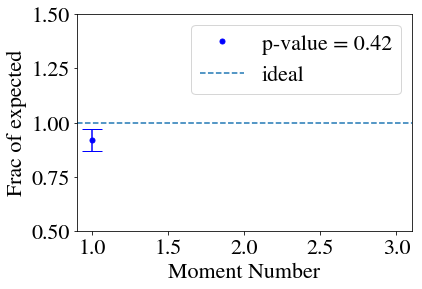

In [485]:
#aarivl times are distributed as a gamma distribution with mean=1/mu , var = 1/mu^2
#siimilar to computation as above, but find the centralized moments
#compare moments to ideal moments and determine p-value
# print(N_wait)
N_wait_hist, bin_edges=histogram(N_wait, bins=50)
moment_num = []
moments = []
moments_err = []
Num_moments = 3
gamma_moments = []
    
# gamma_m1 = float(len(count_stream)/(sum(count_stream)))
# gamma_m2 = gamma_m1**2
# gamma_m3 = gamma_m1**3
# gamma_m4 = gamma_m1**4
# gamma_m5 = gamma_m1**5
# gamma_moments = asarray([gamma_m1, gamma_m2, gamma_m3, gamma_m4, gamma_m5])

### nth moment = sum(x^n)/N
### nth moment error = 1/N sqrt(sum(n^2 x^(2n-1)))
### have assumed the errors on the measured arrival times x are sqrt(x) since I'm counting the measurements between photons

for ii in range(Num_moments):
    moment_num.append(ii+1)
    if ii+1 == 1:
        gamma_moments.append(float(len(count_stream)/(sum(count_stream))))
        moments.append((sum(np.power(N_wait,(ii+1)))/len(N_wait)))
        moments_err.append(1/len(N_wait)* (ii+1)*sqrt(sum(np.power(N_wait,2*(ii+1)-1))))
    else:
        gamma_moments.append(gamma_moments[0]**(ii+1))
        moments.append((sum(np.power(N_wait-moments[0],(ii+1)))/len(N_wait)))
        moments_err.append(1/len(N_wait)* (ii+1)*sqrt(sum(N_wait*np.power(N_wait-moments[0],2*ii))))

gamma_moments = asarray(gamma_moments)
frac_obs = moments/gamma_moments
frac_ideal = gamma_moments/gamma_moments
print(1-moments/gamma_moments)
print(moments_err/gamma_moments)
print(gamma_moments)

#how different are the moments from ideal. use chi^2 and p-value
#observed moments not different enough from expected Poisson process
fit_test = power_divergence(f_obs = frac_obs, f_exp =frac_ideal, lambda_='pearson')

# semilogy(moment_num, gamma_moments,'.')
plot(moment_num,frac_obs,'o', color = 'b', markersize = 5, label = ('p-value = %.2f'%(fit_test[1])))
errorbar(moment_num,frac_obs, yerr=moments_err/gamma_moments,fmt='none', capsize = 10, color='b')
axhline(1, linestyle='dashed', label='ideal')
ylim(0.5,1.5)
xlabel('Moment Number')
ylabel('Frac of expected')
legend()

In [473]:
#how different are the moments from ideal. use chi^2 and p-value
#observed moments not different enough from expected Poisson process
power_divergence(f_obs = frac_obs, f_exp =frac_ideal, lambda_='pearson')

Power_divergenceResult(statistic=0.82440403370076387, pvalue=0.66219048890202692)

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([  27.,   37.,   47.,   57.,   67.,   77.,   87.,   97.,  107.,
         117.,  127.]),
 <a list of 10 Patch objects>)

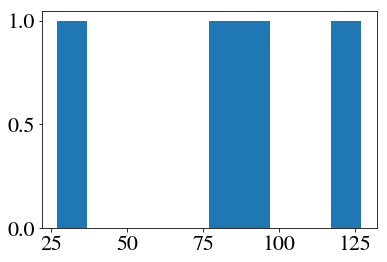

In [486]:
hist(N_wait)

## end moments calculations

In [135]:
### 10-40 measurments with 1e5,1e9 threshold

start = 10
stop = 40
# threshold_list = [67054.0]
# threshold_list = [1e9]
threshold_list = [1e5,1e9]
# threshold_list = logspace(1,9, 15)
first_count_dict_list = []
count_dict_list = []
meas_num_dict_list = []
for thresh in threshold_list:
    first_count_dict = {}
    count_dict = {}
    meas_num_dict = {}
    for p1 in state_dict:
        state_list = state_dict[p1]
        meas_num_dict[p1] = len(state_list)
        max_detected_state_list = []
        first_detected_state_list = []
        max_L = []
        for ii in range (len(state_list)):
            meas_seq = state_list[ii][start:stop]
            gamma_matrix = gamma(meas_seq, T, E)

            P0 = gamma_matrix[:,0] + gamma_matrix[:,1]
            P1 = gamma_matrix[:,2] + gamma_matrix[:,3]

            # Compare the probabilities of the two models to obtain a likelihood ratio
            likelihood_ratio = P1/P0        
            max_L.append(max(likelihood_ratio))
            if max(likelihood_ratio)>thresh:
                max_detected_state_list.append(1)
            else:
                max_detected_state_list.append(0)
                
            if likelihood_ratio[0]>thresh:
                first_detected_state_list.append(1)
            else:
                first_detected_state_list.append(0)
        first_count_dict[p1] = sum(first_detected_state_list)
        count_dict[p1] = sum(max_detected_state_list)

    for dic in [first_count_dict, count_dict, meas_num_dict]:
        del dic[2.7708854882465167e-07]
        del dic[0.01228339687027276]
    first_count_dict_list.append(first_count_dict)
    count_dict_list.append(count_dict)
    meas_num_dict_list.append(meas_num_dict)
#     print(count_dict.values())
#     print(meas_num_dict.values())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:2876: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


[0.00072992700729927003, 0.00024330900243309004]
[0.00047951320142228894, 0.00019417136641828133]
[0.00042126972185945648, 0.00024327940099707403]
[9.8182997587429468e-05, 6.6596298276656464e-05]
[0.39326442049329879, 0.2775485255942679]
[0.046361672165979043, 0.038551714256629226]
[ 0.00185607  0.00087664]
[ 0.00121931  0.00069959]


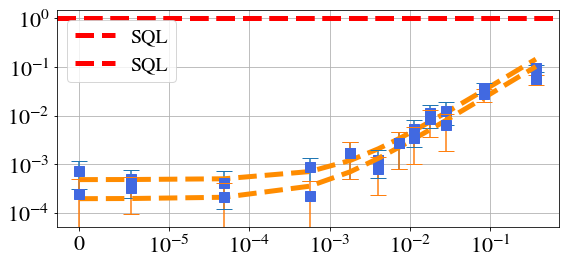

In [168]:
save_figs = False
figure(figsize = (9,4))
nth_list = []
nth_err_list = []
nth_fit_list = []
nth_fit_err_list = []
eff_list = []
eff_err_list = []

for ii in range (len(threshold_list)):
    p1_list = asarray(list(count_dict_list[ii].keys()))
    photon_first_count = asarray([x for _,x in sorted(zip(p1_list,first_count_dict_list[ii].values()))])
    photon_count = asarray([x for _,x in sorted(zip(p1_list,count_dict_list[ii].values()))])
    num_meas = asarray([x for _,x in sorted(zip(p1_list,meas_num_dict_list[ii].values()))])
    p1_list = sort(p1_list)

    err_meas = sqrt(photon_first_count/num_meas*(1-photon_first_count/num_meas) / num_meas)
    err_pred = sqrt(p1_list*(1-p1_list)/num_meas)
    # errorbar(p1_list, p1_list, yerr = err_pred, fmt=None, ecolor='darkorange', capsize = 12)
    # plot(p1_list, p1_list, 'o', color = 'darkorange', markersize = 10,label = "Predicted Photon Probability")
#     errorbar(p1_list, photon_count/num_meas, yerr = err_meas, fmt=None, ecolor= 'royalblue', capsize = 12)
#     plot(p1_list, photon_count/num_meas, 'o', color = 'royalblue', markersize = 10, label = "Measured Photon Probability")
#     errorbar(p1_list, photon_count/num_meas, yerr = err_meas, fmt=None, ecolor= 'royalblue', capsize = 12)
#     plot(p1_list, photon_count/num_meas, 'o', markersize = 10, label = "Threshold = " + str(threshold_list[ii]))
    
#     plot(p1_list, photon_first_count/num_meas, 'o', markersize = 10, color = 'royalblue', label = "Threshold = " + str(threshold_list[ii]))
    
    SQL = 1
    axhline(SQL, linewidth = 5, linestyle = '--', color = 'red', label = "SQL")
    
    fit_start = 0
    fit_stop = -1
#     popt, popt_cov = photon_counter_fit(p1_list[fit_start:fit_stop],photon_first_count[fit_start:fit_stop]/num_meas[fit_start:fit_stop],
#                            fitparams = [0.5, abs(photon_count[-1]/num_meas[-1])], showfit=False)
    
#     plot(p1_list, photon_counter(popt, p1_list),color = 'darkorange', linestyle ='--', linewidth = 5)
#     print(p)
    
    popt, pcov = curve_fit(photon_counter_line, p1_list[fit_start:fit_stop],
                           photon_first_count[fit_start:fit_stop]/num_meas[fit_start:fit_stop], 
                           sigma = err_meas[fit_start:fit_stop], bounds = ([0,0],[1,1]))
    
    plot(p1_list, photon_counter_line(p1_list, *popt),color = 'darkorange', linestyle ='--', linewidth = 5)

#     errorbar(p1_list, photon_count/num_meas, yerr = err_meas, fmt=None, ecolor= 'royalblue', capsize = 12)
#     plot(p1_list, photon_first_count/num_meas, 'o', markersize = 10, color = 'royalblue')

    errorbar(p1_list, photon_count/num_meas, yerr = err_meas, fmt=None, capsize = 8)
    plot(p1_list, photon_first_count/num_meas, 'o', color = 'royalblue', markersize = 10, marker = 's')

    xscale('symlog', linthreshx = 10**(-5.0))
    yscale('symlog', linthreshy = 10**(-5.0))

#     xlim(1e-5,1)
    ylim(5e-5,1.5)
    
    eff = popt[0]
    eff_list.append(eff)
    eff_err_list.append(sqrt(pcov[0][0]))

    
    n_th_fit = popt[1]
    nth_fit_list.append(n_th_fit)
    n_th_fit_err = sqrt(pcov[1][1])
    nth_fit_err_list.append(n_th_fit_err)
    n_th = (photon_first_count[0]/num_meas[0])
    n_th_err = err_meas[0]
    nth_list.append(n_th)
    nth_err_list.append(n_th_err)
    
#     axhline(cavity_p1, linestyle ='--', linewidth = 3, color = 'seagreen', label = "rabi predicted cavity heating")
#     axhline(nth, linestyle ='--', linewidth = 3, color = 'lightcoral', label = "cavity heating lower limit")


    # print ('Photon Count List', [x for _,x in sorted(zip(p1_list,photon_count))])
    # print ('Expected Photon Count', [x for _,x in sorted(zip(p1_list,p1_list*num_meas))])
    # print ('Number of Measurements', [x for _,x in sorted(zip(p1_list,num_meas))])
    # print('Injected P1', sort(p1_list))

    def temperature_c(nu,occ):
        Kb = 1.38e-23
        h = 6.626e-34
        return h*nu/(Kb*log(1/occ+1))
    
#     print ("P $(n=1)$ = ",popt[1]/popt[0])
#     print ("Cavity Temp:" , 1e3*temperature_c(nu_c*1e9,popt[1]/popt[0])," mK" )
    # print ("Cavity Excited State Occupation:" , occupation_q(nu_c,1e3*temperature_q(nu_c,ratio)))

# xlabel("P(n = 1) injected", fontsize = 35)
# ylabel("P(n = 1) measured", fontsize = 35)


# title("Single Photon Counter", fontsize = 35)
legend(fontsize = 20)
grid()
# savefig('../figures/photon_counting_nolabel.pdf', format='pdf', dpi=1200)
if save_figs:
    savefig('../figures/photon_counting_2meas.pdf', format='pdf', dpi=1200)

    
print(nth_list)
print(nth_fit_list)
print(nth_err_list)
print(nth_fit_err_list)
print(eff_list)
print(eff_err_list)

print(asarray(nth_list)/asarray(eff_list))
print(asarray(nth_fit_list)/asarray(eff_list))

In [275]:
### 10-40 measurments with 1e5 threshold

start = 10
stop = 40
# threshold_list = [67054.0]
# threshold_list = [1e9]
threshold_list = [1e5]
# threshold_list = logspace(1,9, 15)
first_count_dict_list = []
count_dict_list = []
meas_num_dict_list = []
for thresh in threshold_list:
    first_count_dict = {}
    count_dict = {}
    meas_num_dict = {}
    for p1 in state_dict:
        state_list = state_dict[p1]
        meas_num_dict[p1] = len(state_list)
        max_detected_state_list = []
        first_detected_state_list = []
        max_L = []
        for ii in range (len(state_list)):
            meas_seq = state_list[ii][start:stop]
            gamma_matrix = gamma(meas_seq, T, E)

            P0 = gamma_matrix[:,0] + gamma_matrix[:,1]
            P1 = gamma_matrix[:,2] + gamma_matrix[:,3]

            # Compare the probabilities of the two models to obtain a likelihood ratio
            likelihood_ratio = P1/P0        
            max_L.append(max(likelihood_ratio))
            if max(likelihood_ratio)>thresh:
                max_detected_state_list.append(1)
            else:
                max_detected_state_list.append(0)
                
            if likelihood_ratio[0]>thresh:
                first_detected_state_list.append(1)
            else:
                first_detected_state_list.append(0)
        first_count_dict[p1] = sum(first_detected_state_list)
        count_dict[p1] = sum(max_detected_state_list)

    for dic in [first_count_dict, count_dict, meas_num_dict]:
        del dic[2.7708854882465167e-07]
        del dic[0.01228339687027276]
    first_count_dict_list.append(first_count_dict)
    count_dict_list.append(count_dict)
    meas_num_dict_list.append(meas_num_dict)
#     print(count_dict.values())
#     print(meas_num_dict.values())



ValueError: operands could not be broadcast together with shapes (2,) (12,) 

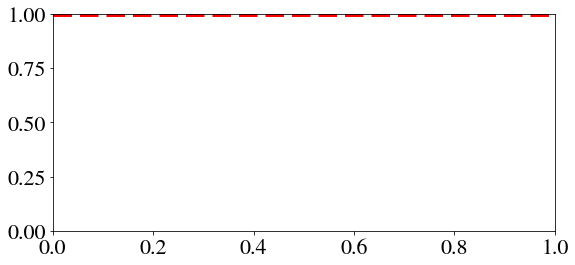

In [276]:
save_figs = False
figure(figsize = (9,4))
nth_list = []
eff_list = []

for ii in range (len(threshold_list)):
    p1_list = asarray(list(count_dict_list[ii].keys()))
    photon_first_count = asarray([x for _,x in sorted(zip(p1_list,first_count_dict_list[ii].values()))])
    photon_count = asarray([x for _,x in sorted(zip(p1_list,count_dict_list[ii].values()))])
    num_meas = asarray([x for _,x in sorted(zip(p1_list,meas_num_dict_list[ii].values()))])
    p1_list = sort(p1_list)

    err_meas = sqrt(photon_count/num_meas*(1-photon_count/num_meas) / num_meas)
    err_pred = sqrt(p1_list*(1-p1_list)/num_meas)
    # errorbar(p1_list, p1_list, yerr = err_pred, fmt=None, ecolor='darkorange', capsize = 12)
    # plot(p1_list, p1_list, 'o', color = 'darkorange', markersize = 10,label = "Predicted Photon Probability")
#     errorbar(p1_list, photon_count/num_meas, yerr = err_meas, fmt=None, ecolor= 'royalblue', capsize = 12)
#     plot(p1_list, photon_count/num_meas, 'o', color = 'royalblue', markersize = 10, label = "Measured Photon Probability")
#     errorbar(p1_list, photon_count/num_meas, yerr = err_meas, fmt=None, ecolor= 'royalblue', capsize = 12)
#     plot(p1_list, photon_count/num_meas, 'o', markersize = 10, label = "Threshold = " + str(threshold_list[ii]))
    
#     plot(p1_list, photon_first_count/num_meas, 'o', markersize = 10, color = 'royalblue', label = "Threshold = " + str(threshold_list[ii]))
    
    SQL = 1
    axhline(SQL, linewidth = 5, linestyle = '--', color = 'red', label = "SQL")
    
    fit_start = 0
    fit_stop = -1
    popt = photon_counter_fit(p1_list[fit_start:fit_stop],photon_count[fit_start:fit_stop]/num_meas[fit_start:fit_stop],
                           fitparams = [0.5, abs(photon_count[-1]/num_meas[-1])], showfit=False)
    plot(p1_list, photon_counter(popt, p1_list),color = 'darkorange', linestyle ='--', linewidth = 5)
#     print(p)
    
#     popt, pcov = curve_fit(photon_counter_line, p1_list[fit_start:fit_stop],
#                            photon_count[fit_start:fit_stop]/num_meas[fit_start:fit_stop], 
#                            sigma = err_meas[fit_start:fit_stop])
    
#     errorbar(p1_list, photon_count/num_meas, yerr = err_meas, fmt=None, ecolor= 'royalblue', capsize = 12)
#     plot(p1_list, photon_first_count/num_meas, 'o', markersize = 10, color = 'royalblue')

    errorbar(p1_list, photon_count/num_meas, yerr = err_meas, fmt=None, capsize = 8)
    plot(p1_list, photon_first_count/num_meas, 'o', color = 'royalblue', markersize = 10, marker = 'o')

    xscale('symlog', linthreshx = 10**(-5.0))
    yscale('symlog', linthreshy = 10**(-5.0))

#     xlim(1e-5,1)
    ylim(5e-5,1.5)
    
    eff = popt[0]
    eff_list.append(eff)
    print (popt)
    
    cavity_p1 = 0.00465009208455
    nth = popt[1]
    n_th = (photon_count[0]/num_meas[0])
    nth_list.append(n_th)
    
    print (photon_count[0]/num_meas[0])
#     axhline(cavity_p1, linestyle ='--', linewidth = 3, color = 'seagreen', label = "rabi predicted cavity heating")
#     axhline(nth, linestyle ='--', linewidth = 3, color = 'lightcoral', label = "cavity heating lower limit")


    # print ('Photon Count List', [x for _,x in sorted(zip(p1_list,photon_count))])
    # print ('Expected Photon Count', [x for _,x in sorted(zip(p1_list,p1_list*num_meas))])
    # print ('Number of Measurements', [x for _,x in sorted(zip(p1_list,num_meas))])
    # print('Injected P1', sort(p1_list))

    def temperature_c(nu,occ):
        Kb = 1.38e-23
        h = 6.626e-34
        return h*nu/(Kb*log(1/occ+1))
    
    print ("P $(n=1)$ = ",popt[1]/popt[0])
    print ("Cavity Temp:" , 1e3*temperature_c(nu_c*1e9,popt[1]/popt[0])," mK" )
    # print ("Cavity Excited State Occupation:" , occupation_q(nu_c,1e3*temperature_q(nu_c,ratio)))

# xlabel("P(n = 1) injected", fontsize = 35)
# ylabel("P(n = 1) measured", fontsize = 35)


# title("Single Photon Counter", fontsize = 35)
legend(fontsize = 20)
grid()
# savefig('../figures/photon_counting_nolabel.pdf', format='pdf', dpi=1200)
if save_figs:
    savefig('../figures/photon_counting_30meas_1e5.pdf', format='pdf', dpi=1200)

    
print(num_meas)

In [131]:
### 10-41 measurments with 1e9 threshold

start = 10
stop = 41
# threshold_list = [67054.0]
threshold_list = [1e9]

# threshold_list = logspace(1,9, 15)
first_count_dict_list = []
count_dict_list = []
meas_num_dict_list = []
for thresh in threshold_list:
    first_count_dict = {}
    count_dict = {}
    meas_num_dict = {}
    for p1 in state_dict:
        state_list = state_dict[p1]
        meas_num_dict[p1] = len(state_list)
        max_detected_state_list = []
        first_detected_state_list = []
        max_L = []
        for ii in range (len(state_list)):
            meas_seq = state_list[ii][start:stop]
            gamma_matrix = gamma(meas_seq, T, E)

            P0 = gamma_matrix[:,0] + gamma_matrix[:,1]
            P1 = gamma_matrix[:,2] + gamma_matrix[:,3]

            # Compare the probabilities of the two models to obtain a likelihood ratio
            likelihood_ratio = P1/P0        
            max_L.append(max(likelihood_ratio))
            if max(likelihood_ratio)>thresh:
                max_detected_state_list.append(1)
            else:
                max_detected_state_list.append(0)
                
            if likelihood_ratio[0]>thresh:
                first_detected_state_list.append(1)
            else:
                first_detected_state_list.append(0)
        first_count_dict[p1] = sum(first_detected_state_list)
        count_dict[p1] = sum(max_detected_state_list)

    for dic in [first_count_dict, count_dict, meas_num_dict]:
        del dic[2.7708854882465167e-07]
        del dic[0.01228339687027276]
    first_count_dict_list.append(first_count_dict)
    count_dict_list.append(count_dict)
    meas_num_dict_list.append(meas_num_dict)
#     print(count_dict.values())
#     print(meas_num_dict.values())



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:2876: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


[  3.24467167e-01   2.08669602e-04]
0.000486618004866
P $(n=1)$ =  0.000643114692556
Cavity Temp: 39.2700673802  mK
[4110 6186 4845 4511 1199 2480  747  576  356  320  400  320]
400


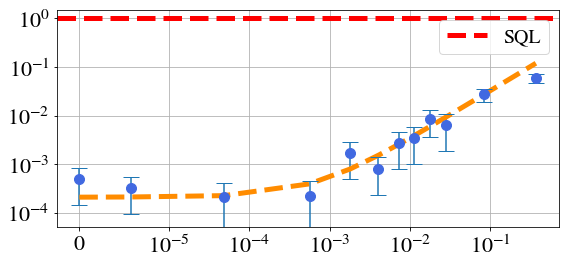

In [133]:
save_figs = False
figure(figsize = (9,4))
nth_list = []
eff_list = []

for ii in range (len(threshold_list)):
    p1_list = asarray(list(count_dict_list[ii].keys()))
    photon_first_count = asarray([x for _,x in sorted(zip(p1_list,first_count_dict_list[ii].values()))])
    photon_count = asarray([x for _,x in sorted(zip(p1_list,count_dict_list[ii].values()))])
    num_meas = asarray([x for _,x in sorted(zip(p1_list,meas_num_dict_list[ii].values()))])
    p1_list = sort(p1_list)

    err_meas = sqrt(photon_count/num_meas*(1-photon_count/num_meas) / num_meas)
    err_pred = sqrt(p1_list*(1-p1_list)/num_meas)
    # errorbar(p1_list, p1_list, yerr = err_pred, fmt=None, ecolor='darkorange', capsize = 12)
    # plot(p1_list, p1_list, 'o', color = 'darkorange', markersize = 10,label = "Predicted Photon Probability")
#     errorbar(p1_list, photon_count/num_meas, yerr = err_meas, fmt=None, ecolor= 'royalblue', capsize = 12)
#     plot(p1_list, photon_count/num_meas, 'o', color = 'royalblue', markersize = 10, label = "Measured Photon Probability")
#     errorbar(p1_list, photon_count/num_meas, yerr = err_meas, fmt=None, ecolor= 'royalblue', capsize = 12)
#     plot(p1_list, photon_count/num_meas, 'o', markersize = 10, label = "Threshold = " + str(threshold_list[ii]))
    
#     plot(p1_list, photon_first_count/num_meas, 'o', markersize = 10, color = 'royalblue', label = "Threshold = " + str(threshold_list[ii]))
    
    SQL = 1
    axhline(SQL, linewidth = 5, linestyle = '--', color = 'red', label = "SQL")
    
    fit_start = 0
    fit_stop = -1
    popt = photon_counter_fit(p1_list[fit_start:fit_stop],photon_count[fit_start:fit_stop]/num_meas[fit_start:fit_stop],
                           fitparams = [0.5, abs(photon_count[-1]/num_meas[-1])], showfit=False)
    plot(p1_list, photon_counter(popt, p1_list),color = 'darkorange', linestyle ='--', linewidth = 5)
#     print(p)
    
#     popt, pcov = curve_fit(photon_counter_line, p1_list[fit_start:fit_stop],
#                            photon_count[fit_start:fit_stop]/num_meas[fit_start:fit_stop], 
#                            sigma = err_meas[fit_start:fit_stop])
    
#     errorbar(p1_list, photon_count/num_meas, yerr = err_meas, fmt=None, ecolor= 'royalblue', capsize = 12)
#     plot(p1_list, photon_first_count/num_meas, 'o', markersize = 10, color = 'royalblue')

    errorbar(p1_list, photon_count/num_meas, yerr = err_meas, fmt=None, capsize = 8)
    plot(p1_list, photon_first_count/num_meas, 'o', color = 'royalblue', markersize = 10, marker = 'o')

    xscale('symlog', linthreshx = 10**(-5.0))
    yscale('symlog', linthreshy = 10**(-5.0))

#     xlim(1e-5,1)
    ylim(5e-5,1.5)
    
    eff = popt[0]
    eff_list.append(eff)
    print (popt)
    
    cavity_p1 = 0.00465009208455
    nth = popt[1]
    n_th = (photon_count[0]/num_meas[0])
    nth_list.append(n_th)
    
    print (photon_count[0]/num_meas[0])
#     axhline(cavity_p1, linestyle ='--', linewidth = 3, color = 'seagreen', label = "rabi predicted cavity heating")
#     axhline(nth, linestyle ='--', linewidth = 3, color = 'lightcoral', label = "cavity heating lower limit")


    # print ('Photon Count List', [x for _,x in sorted(zip(p1_list,photon_count))])
    # print ('Expected Photon Count', [x for _,x in sorted(zip(p1_list,p1_list*num_meas))])
    # print ('Number of Measurements', [x for _,x in sorted(zip(p1_list,num_meas))])
    # print('Injected P1', sort(p1_list))

    def temperature_c(nu,occ):
        Kb = 1.38e-23
        h = 6.626e-34
        return h*nu/(Kb*log(1/occ+1))
    
    print ("P $(n=1)$ = ",popt[1]/popt[0])
    print ("Cavity Temp:" , 1e3*temperature_c(nu_c*1e9,popt[1]/popt[0])," mK" )
    # print ("Cavity Excited State Occupation:" , occupation_q(nu_c,1e3*temperature_q(nu_c,ratio)))

# xlabel("P(n = 1) injected", fontsize = 35)
# ylabel("P(n = 1) measured", fontsize = 35)


# title("Single Photon Counter", fontsize = 35)
legend(fontsize = 20)
grid()
# savefig('../figures/photon_counting_nolabel.pdf', format='pdf', dpi=1200)
if save_figs:
    savefig('../figures/photon_counting_30meas_1e8.pdf', format='pdf', dpi=1200)

    
print(num_meas)
print(num_meas[-2])

In [ ]:
# 2 meas [ 0.91169112  0.03250976], [ 0.75493524  0.04524004]
# 5 meas [ 0.68750005  0.04705666]
# 6 meas [ 0.58637501  0.03102815]
# 7 meas [ 0.71128661  0.01210305]
# 8 meas [ 0.80265514  0.00844437]
# 9 meas [ 0.94441736  0.00592536]
# 10 meas [ 0.96011006  0.00493595]
# 12 meas [ 0.82000761  0.00557311]
# 14 meas [ 0.84733426  0.00545765]
# 18 meas [ 0.82866664  0.00550024]
# 25 meas [ 0.83588453  0.00604802]
# 35 meas [ 0.87258558  0.00597895]

In [144]:
alpha_len = 25
alpha_amp = 0.2

alpha = alpha_amp*0.008349770575467376*sqrt(2*pi)*alpha_len
p1 = (alpha**2)*exp(alpha**2)
print(p1)

alpha= sqrt(2*pi)*alpha_len*test_omega[argmin(abs(transfer_fn(test_omega)-alpha_amp))]
p1 = (alpha**2)*exp(alpha**2)
print(p1)

7.23676927e-03

0.0110719747699
0.0122833968703


0.00723676927

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


dict_keys([0.01135324397826302, 0.01228339687027276, 0.0040579069409568749, 0.0072367692721696641])
dict_values([2, 27, 9, 2])
dict_values([98, 719, 239, 79])


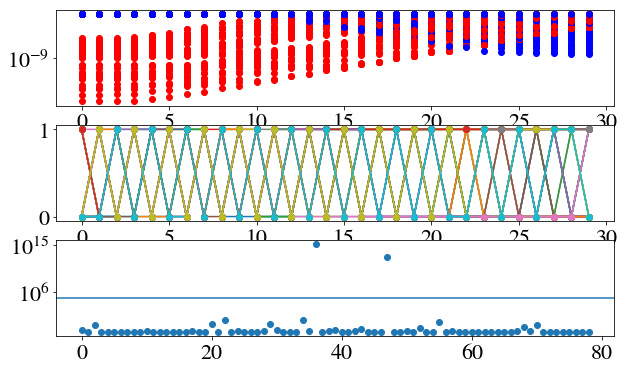

In [142]:
figure(figsize=(10,6))
threshold = 67054.0
# threshold = 1e8
count_dict = {}
meas_num_dict = {}
for p1 in state_dict2:
    state_list = state_dict2[p1][0:-1]
    meas_num_dict[p1] = len(state_list)
    max_detected_state_list = []
    max_L = []
    for ii in range (len(state_list)):
        meas_seq = state_list[ii]
        gamma_matrix = gamma(meas_seq, T, E)

        P0 = gamma_matrix[:,0] + gamma_matrix[:,1]
        P1 = gamma_matrix[:,2] + gamma_matrix[:,3]

        # Compare the probabilities of the two models to obtain a likelihood ratio
        likelihood_ratio = P1/P0        
        max_L.append(max(likelihood_ratio))
        if max(likelihood_ratio)>threshold:
            max_detected_state_list.append(1)
            subplot(311)
            semilogy(P1, 'bo')
            semilogy(P0, 'ro')
            subplot(312)
            plot(meas_seq, 'o-')
        else:
            max_detected_state_list.append(0)
    count_dict[p1] = sum(max_detected_state_list)

subplot(313)
semilogy(max_L, 'o')
axhline(threshold)

print(state_dict2.keys())
print(count_dict.values())
print(meas_num_dict.values())